# Regression Model - Regularization - House Price Prediction
By: Lavanya.M

# Problem Statement
- Model the price of houses - a regression model using regularisation in order to predict the actual value of the prospective properties
- Determine the features which are significant in predicting the price of a house, and how well these features describe the price of a house.
- Determining the optimal value of lambda for ridge and lasso regression.
 


# Table Of Contents<br/>

[Importing Required Libraries](#SetupEnvironment)<br/><br/>
1. [**Step 1: Reading and Understanding Data**](#RUD)<br/>
    1.1 [Running Pandas Profiler](#RPP)<br/>
    

2. [**Step 2: Data Preparation & EDA**](#DP)<br/>
    2.1 [Removing Redundant Features](#RFCV)<br/>
    > 2.1.1 [Removing Features with Constant Values](#RFCV)<br/>
    > 2.1.2 [Checking & Removing Features with 85%+ Constant Values](#RF99CV)<br/>
    > 2.1.3 [Evaluating ID Features having all Unique values](#RIFUV)<br/>
    > 2.1.4 [Evaluating Features having High missing values](#EFMV)<br/>
    
    2.2 [Check for Duplicates](#CD)<br/>
    2.3 [Check & Treat Missing Values](#CTMV)<br/>
    > 2.3.1 [Remove the ROWS  having some percentage missing values](#RRMV)<br/>
    
    > 2.3.2 [Handling Missing Data for Categorical Variables](#CVMV)<br/>
    >> 2.3.2.1 [Analyzing the Basement Features for Missing Values](#BFMV)<br/>
    > 2.3.2.2 [Analyzing the Garage Features for Missing Values](#GFMV)<br/>
    > 2.3.2.3 [Analyzing the Masonry Features for Missing Values](#MFMV)<br/>
    
    > 2.3.3 [Handling Missing Data for Numerical Features](#CNFMV)<br/>
    
    2.4 [Check & Fix Datatypes](#CFD)<br/>
    2.5 [Derived Features - Year Features into Age](#DFYFA)<br/>
    2.6 [Outlier Analysis & Treatment](#OAT)<br/>
    2.7 [Feature Analysis (Numerical & Categorical) - Dependent Variable with Independent Variables](#FADVIV)<br/>
    2.8 [Numerical Features Analysis](#NFA)
    > 2.8.1 [Numerical Features - Univariate Analysis](#NFUA)<br/>
    > 2.8.2 [Correlation Analysis - Bivariate Analysis](#CA)<br/>
    > 2.8.3 [Numerical Features - Segmented Analysis](#NFSA)
    
    2.9 [Categorical Features Analysis](#CFA)<br/>
    > 2.9.1 [Categorical Features - Univariate Analysis](#CFUA)<br/>

3. [**Step 3: Feature Engineering - Data Preparation**](#FEDP)<br/>
    3.1 [Label Encoding for Ordered Categorical Variables](#LE)<br/>
    3.2 [Dummy Encoding for Unordered Categorical Variables](#DC)<br/>


4. [**Step 4: Split Data into Training and Test Sets**](#split)<br/>


5. [**Step 5: Training the Model**](#train)<br/>
    5.1 [MinMax Scaling](#MMS)<br/>
    5.2 [RFE](#RFE)<br/>
    5.3 [Building model using statsmodel, for the detailed statistics](#STATS)<br/>
    5.4 [Ridge Regression](#Ridge)<br/>
    5.5 [Lasso Regression](#lasso)<br/>


6. [**Step 6: Predictions and Evaluation on the Test Set**](#evaluation)<br/>

<a id="SetupEnvironment"></a>
# Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd

#import pandas_profiling as pp # pip install pandas-profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics
from scipy import stats

import math
from datetime import datetime

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# View max columns
pd.options.display.max_columns = None

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id="RUD"></a>
# 1. Reading and Understanding Data

In [76]:
df = pd.read_csv("/content/train (2).csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [77]:
df.shape

(1460, 81)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 Data Interpretation for dataframe info() 
- There are features having missing value that need to be treated before modelling. Some of these missing value features can be dropped too.

In [79]:
df.describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
0%        1.000000    20.000000    21.000000    1300.000000     1.000000   
5%       73.950000    20.000000    34.000000    3311.700000     4.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
0%        1.000000  1872.000000   1950.000000     0.000000     0.000000   
5%        4.000000  1916.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
0%        0.000000     0.000000     0.000000   334.000000     0.000000   
5%        0.000000     0.000000   519.300000   672.950000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
0%         0.000000   334.000000      0.000000      0.000000     0.000000   
5%         0.000000   848.000000      0.000000      0.000000     1.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000

 Data Interpretation for dataframe describe 
- There are higher values but they don't seem to be incorrect values.
- Need to plot a box plot to visually check the outliers.

<a id="PP"></a>
### 1.1 Running Pandas Profiler

Executing profiler and analyzing results.<br/>
Note: The profiler execution will take time. Kindly wait for the processing to complete.

In [ ]:
# profile = pp.ProfileReport(df)
# Generate HTML file for easy viewing for later
# profile.to_file(outputfile="df_profile.html")
# profile

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df,title="houseprice",html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file(output_file="REPORT.html")

In [ ]:
!ls

In [ ]:
!cat REPORT.html

In [ ]:
on right side beside files download the eda report

<a id="DP"></a>
# 2. Data Preparation & EDA

<a id="RRF"></a>
<a id="RFCV"></a>
### 2.1 Removing Redundant Features
#### 2.1.1 Removing Features with Constant Values
 - There are features having a higher percentage of constant values. But no feature with 100% constant value.
 - Next step to check features with 85% constant value and above.

<a id="RF99CV"></a>
#### 2.1.2 Removing Features with 85% Constant Value
 - Pandas Profiler suggests the following featuers having a constant value frequency of 85%. Hence we can remove these features. Checking the business sense of these features to take a decision
    1. **_3SsnPorch_** has 98.4% "zero" values
    - **_BsmtCond_** has 89.8% ~ 90%  "TA" values
    - **_BsmtFinType2_** has 86.03% values as Unf
    - **_BsmtFinSF2_** has 88.6% "zero" values
    - **_BsmtHalfBath_** has 94.4% "zero" values
    - **_CentralAir_** has 93.5% "Y" values
    - **_Condition1_** has 86.3% values as Norm
    - **_Condition2_** has 99.0% "Norm" values
    - **_Electrical_** has 91.4% "SBrkr" values
    - **_EnclosedPorch_** has 85.8% "zero" values
    - **_ExterCond_** has 97.81% values as TA
    - **_Functional_** has 93.2% "Typ" values
    - **_GarageCond_** has 90.8% "TA" values
    - **_GarageQual_** has 89.8% ~ 90% "TA" values
    - **_Heating_** has 97.8% "GasA" values
    - **_KitchenAbvGr_** has 95.3% "1" values
    - **_LandContour_** has 89.8% ~ 90% "Lvl" values
    - **_LandSlope_** has 94.7% "Gtl" values
    - **_LowQualFinSF_** has 98.2% "0" values
    - **_MiscVal_** has 96.4% "0" values
    - **_PavedDrive_** has 91.8% "Y" values
    - **_PoolArea_** has 99.5% "0" values
    - **_RoofMatl_** has 98.2% "CompShg" values
    - **_ScreenPorch_** has 92.1% "0" values
    - **_SaleType_** has 86.78% values as WD
    - **_Street_** has 99.6% "Pave" values
    - **_Utilities_** has 99.9% "AllPub" values

In [81]:
const_features_85_lst = ['3SsnPorch','BsmtCond','BsmtFinSF2','BsmtHalfBath','CentralAir','Condition2',
                         'Electrical','EnclosedPorch','Functional','GarageCond','GarageQual','Heating',
                         'KitchenAbvGr','LandContour','LandSlope','LowQualFinSF','MiscVal','PavedDrive',
                         'PoolArea','RoofMatl','ScreenPorch','Street','Utilities', 'SaleType','Condition1',
                         'BsmtFinType2','ExterCond']

df.drop(const_features_85_lst, axis=1, inplace= True)

<a id="RIFUV"></a>
#### 2.1.3 Evaluating ID Features having all Unique values
 - ID Column is the only feature having all unique values.

<a id="EFMV"></a>
#### 2.1.4 Evaluating Features having High missing values

In [82]:
# Missing values
round((df.isnull().sum()/len(df)) * 100,0)

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Alley             94.0
LotShape           0.0
LotConfig          0.0
Neighborhood       0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
Foundation         0.0
BsmtQual           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
HeatingQC          0.0
1stFlrSF           0.0
2ndFlrSF           0.0
GrLivArea          0.0
BsmtFullBath       0.0
FullBath           0.0
HalfBath           0.0
BedroomAbvGr       0.0
KitchenQual        0.0
TotRmsAbvGrd       0.0
Fireplaces         0.0
FireplaceQu       47.0
GarageType         6.0
GarageYrBlt        6.0
GarageFinish       6.0
GarageCars 

 Data Interpretation of Missing values in Columns 
 -  Removing columns having High missing values
 - Following columns to be dropped for having more than 30% missing values
    - Alley
    - FireplaceQu
    - PoolQC
    - Fence
    - MiscFeature

In [83]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace= True)

In [84]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
0        150          856        Ex       856       854       1710   
1        284         1262        Ex      1262         0       1262   
2        434          920        Ex       920       866       1786   
3        540          756        Gd       961       756       1717   
4        490         1145        Ex      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
0             1         2         1             3          Gd             8   
1             0         2         0             3          TA             6   
2             1         2         1             3          Gd             6   
3             1         1         0             3          Gd             7   
4             1         2         1             4          Gd             9   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0     Attchd       2003.0          RFn           2         548   
1           1     Attchd       1976.0          RFn           2         460   
2           1     Attchd       2001.0          RFn           2         608   
3           1     Detchd       1998.0          Unf           3         642   
4           1     Attchd       2000.0          RFn           3         836   

   WoodDeckSF  OpenPorchSF  MoSold  YrSold SaleCondition  SalePrice  
0           0           61       2    2008        Normal     208500  
1         298            0       5    2007        Normal     181500  
2           0           42       9    2008        Normal     223500  
3           0           35       2    2006       Abnorml     140000  
4         192           84      12    2008        Normal     250000

In [85]:
df.shape

(1460, 49)

<a id="CD"></a>
### 2.2 Check for Duplicates

In [86]:
#Checking for Duplicates in dataframe
print(df.duplicated().value_counts())

False    1460
dtype: int64


In [87]:
#Checking for Duplicates without the ID column
print(df.drop('Id',axis=1).duplicated().value_counts())

False    1460
dtype: int64


 Data Interpretation of Duplicates 
- There are no duplicate rows in the dataset



<a id="CTMV"></a>
### 2.3 Check & Treat Missing Values

<a id="RRMV"></a>
#### 2.3.1 Remove the ROWS  having some percentage missing values

In [88]:
# count the number of rows having >=30% missing values
print("30% missing values")
print("Count:", len(df[df.isnull().sum(axis=1) >= len(df.columns)*0.3].index))
print("Percentage:", round(100*(len(df[df.isnull().sum(axis=1) >= len(df.columns)*0.3].index) / len(df.index)),2),"%")

30% missing values
Count: 0
Percentage: 0.0 %


 Data Interpretation of Missing values in Rows 
- There are no rows having more than 30% missing values

<a id="CVMV"></a>
#### 2.3.2 Handling Missing Data for Categorical Variables

In [89]:
#selecting numerical variables
numerical_features = list(df.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Id']))
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)

Numerical Columns:  ['TotalBsmtSF', 'YearBuilt', 'OverallCond', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'LotFrontage', 'GrLivArea', 'GarageYrBlt', 'MoSold', 'WoodDeckSF', 'OverallQual', 'BsmtFinSF1', 'YearRemodAdd', 'MasVnrArea', '2ndFlrSF', 'OpenPorchSF', 'BedroomAbvGr', 'SalePrice', 'BsmtFullBath', 'HalfBath', 'GarageCars', 'Fireplaces', 'YrSold', 'BsmtUnfSF', 'LotArea', 'FullBath', 'MSSubClass']

Categorical Columns:  ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


In [90]:
lst_nullval_feat = df.columns[df.isnull().any()]
lst_nullval_feat = list(set(lst_nullval_feat).intersection(set(categorical_features)))
print("Categorical Features having Null Values:", lst_nullval_feat)

Categorical Features having Null Values: ['MasVnrType', 'BsmtFinType1', 'BsmtQual', 'GarageType', 'GarageFinish', 'BsmtExposure']


 Data Interpretation of Missing Values in Categorical Variables 
- There seems to be a business perspective behind Basement, Garage and Masonry reated Featues. The reason is that:
    - All Basement Features have 3% missing data
    - All Garage Featues have 6% missing data
    - All Masonry Features have 1% missing data

<a id="BFMV"></a>
##### 2.3.2.1 Analyzing the Basement Features for Missing Values
- Basement related features have 3% missing data. 
- This may suggest that these 3% features indicate No Basement. This needs to be analyzed.
- The value of NA for BsmtQual suggests that there is no basement as per the data dictionary.

In [91]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

An indication that nan may actually be NA - No Basement

In [92]:
# Viewing Basement Related Features
bsmt_features = []
for i in df.columns:
    if (i.lower().find('bsmt') != -1):
        bsmt_features.append(i)

# Checking the dataset for TotalBsmtSF = 0. This would suggest there is no Basement
df[bsmt_features].query('TotalBsmtSF == 0')

BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
17        NaN          NaN          NaN           0          0            0   
39        NaN          NaN          NaN           0          0            0   
90        NaN          NaN          NaN           0          0            0   
102       NaN          NaN          NaN           0          0            0   
156       NaN          NaN          NaN           0          0            0   
182       NaN          NaN          NaN           0          0            0   
259       NaN          NaN          NaN           0          0            0   
342       NaN          NaN          NaN           0          0            0   
362       NaN          NaN          NaN           0          0            0   
371       NaN          NaN          NaN           0          0            0   
392       NaN          NaN          NaN           0          0            0   
520       NaN          NaN          NaN           0          0            0   
532       NaN          NaN          NaN           0          0            0   
533       NaN          NaN          NaN           0          0            0   
553       NaN          NaN          NaN           0          0            0   
646       NaN          NaN          NaN           0          0            0   
705       NaN          NaN          NaN           0          0            0   
736       NaN          NaN          NaN           0          0            0   
749       NaN          NaN          NaN           0          0            0   
778       NaN          NaN          NaN           0          0            0   
868       NaN          NaN          NaN           0          0            0   
894       NaN          NaN          NaN           0          0            0   
897       NaN          NaN          NaN           0          0            0   
984       NaN          NaN          NaN           0          0            0   
1000      NaN          NaN          NaN           0          0            0   
1011      NaN          NaN          NaN           0          0            0   
1035      NaN          NaN          NaN           0          0            0   
1045      NaN          NaN          NaN           0          0            0   
1048      NaN          NaN          NaN           0          0            0   
1049      NaN          NaN          NaN           0          0            0   
1090      NaN          NaN          NaN           0          0            0   
1179      NaN          NaN          NaN           0          0            0   
1216      NaN          NaN          NaN           0          0            0   
1218      NaN          NaN          NaN           0          0            0   
1232      NaN          NaN          NaN           0          0            0   
1321      NaN          NaN          NaN           0          0            0   
1412      NaN          NaN          NaN           0          0            0   

      BsmtFullBath  
17               0  
39               0  
90               0  
102              0  
156              0  
182              0  
259              0  
342              0  
362              0  
371              0  
392              0  
520              0  
532              0  
533              0  
553              0  
646              0  
705              0  
736              0  
749              0  
778              0  
868              0  
894              0  
897              0  
984              0  
1000             0  
1011             0  
1035             0  
1045             0  
1048             0  
1049             0  
1090             0  
1179             0  
1216             0  
1218             0  
1232             0  
1321             0  
1412             0

 Data Interpretation of Missing Values of Basement Features 
- The nan values appear for properties having No Basement
- The missing values of all categorical Basement Variables should be imputed to 'NA' as per the data dictionary

In [93]:
# Replacing missing values with "NA" value based on analysis done on Basement Features
df['BsmtExposure'].fillna('NA',inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)

<a id="GFMV"></a>
##### 2.3.2.2 Analyzing the Garage Features for Missing Values
- Basement related features have 6% missing data. 
- This may suggest that these 6% features indicate No Garage. This needs to be analyzed.
- The value of NA for Garage Categorical Features suggests that there is no garage as per the data dictionary.

In [94]:
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

An indication that nan may actually be NA - No Garage

In [95]:
# Viewing Garage Related Features
garage_features = []
for i in df.columns:
    if (i.lower().find('garage') != -1):
        garage_features.append(i)

# Checking the dataset for GarageArea = 0. This would suggest there is no Garage
df[garage_features].query('GarageArea == 0')

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea
39          NaN          NaN          NaN           0           0
48          NaN          NaN          NaN           0           0
78          NaN          NaN          NaN           0           0
88          NaN          NaN          NaN           0           0
89          NaN          NaN          NaN           0           0
...         ...          ...          ...         ...         ...
1349        NaN          NaN          NaN           0           0
1407        NaN          NaN          NaN           0           0
1449        NaN          NaN          NaN           0           0
1450        NaN          NaN          NaN           0           0
1453        NaN          NaN          NaN           0           0

[81 rows x 5 columns]

 Data Interpretation of Missing Values of Garage Features 
- The nan values appear for properties having No Garage
- The missing values of all categorical Garage Variables should be imputed to 'NA' as per the data dictionary
- GarageYrBlt 
    - Can't be imputed with 0 as that would be incorrect information
    - For GarageYrBlt feature should be derived into Age Feature.
    - The Age Feature would be computed based on current year (2019 - GarageYrBlt)
    - For these 81 missing values we should impute with either mode or median - To be decided while working with numerical features

In [96]:
# Replacing missing values with "NA" value based on analysis done on Garage Features
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageType'].fillna('NA',inplace=True)

<a id="MFMV"></a>
##### 2.3.2.3 Analyzing the Masonry Features for Missing Values
- Basement related features have 1% missing data. 
- This may suggest that these 1% features indicate No Masonry Area. This needs to be analyzed.
- The value of none for Masonry Categorical Features suggests that there is no Masonry Area as per the data dictionary.

In [97]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

An indication that nan may actually be none - No Masonry Area

In [98]:
# Viewing Garage Related Features
masonry_features = []
for i in df.columns:
    if (i.lower().find('masvnr') != -1):
        masonry_features.append(i)

# Checking the dataset for MasVnrArea = 0. This would suggest there is no Masonry Area
df[masonry_features][df[masonry_features].isnull().any(axis=1)]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

 Data Interpretation of Missing Values of Masonry Features 
- The nan values appear for properties having No Masonry Area
- The missing values of all categorical Masonry Variables should be imputed to 'None' as per the data dictionary
- For the numerical feature (MasVnrArea) it should be imputed with 0, indicating no Masonry Area

In [99]:
# Replacing missing values with "None" value based on analysis done on Masonry Features
# Imputing missing value of numerical masonry feature with 0
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

In [100]:
# Missing values
round((df.isnull().sum()/len(df)) * 100,0)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
GrLivArea         0.0
BsmtFullBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
GarageType        0.0
GarageYrBlt       6.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
MoSold    

<a id="CNFMV"></a>
#### 2.3.3 Handling Missing Data for Numerical Features

In [101]:
# Custom function for plotting histogram
def histogram(df, col_name):
    plt.figure(figsize=(6,3))
    plt.hist(df[col_name],alpha=0.7, ec='black')
    plt.xlabel(col_name)
    plt.ylabel('frequency')
    plt.title(col_name + ' Frequency')
    plt.plot()

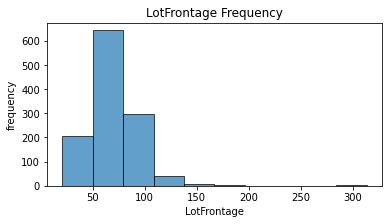

In [102]:
histogram(df, 'LotFrontage')

In [103]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

 Data Interpretation of LotFrontage Histogram 
- The feature seems to be a continuous numerical feature and the missing values should be replaced with median
- Also, the LotFrontage (Linear feet of street connected to property) seems to be a feature which could potentially be binned.

In [104]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

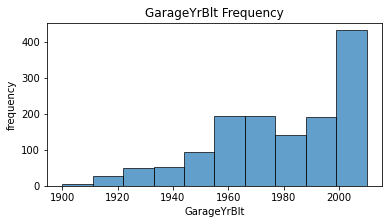

In [105]:
histogram(df, 'GarageYrBlt')

 Data Interpretation of GarageYrBlt Histogram 
- The feature is a discrete numerical feature as we are only considering the Years.
- Also, the GarageYrBlt seems to be a feature which could be derived into Age Feature and maybe binned.
- _Ideally the nan values in this feature depicts that there is No Garage in the property. However, if we impute by 0 then that would become an outlier value. Since, there are only 6% / 81 values which are nan's imputing with mean._

In [106]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

In [107]:
# missing values
round((df.isnull().sum()/len(df)) * 100,1)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
MoSold           0.0
YrSold           0.0
SaleCondition

All Missing values treated

In [108]:
df.reset_index(drop=True,inplace=True)

In [109]:
df.shape

(1460, 49)

In [110]:
#Re-running the profiler to view / review post the clean up
profile = pp.ProfileReport(df)
profile

NameError: ignored

##### Checking Features having Zero values for Null's
Checking to see if they are null's or if they add meaning to the dataset. From the profiler we have the following information:
- 2ndFlrSF has 829 / 56.8% zeros Zeros ==> Zeros would suggest that the property does not have a 2nd Floor
- BsmtFinSF1 has 467 / 32.0% zeros Zeros ==> Zeros would suggest that the property does not have a Type 1 finished BsmtFinSF1.
- BsmtFullBath has 856 / 58.6% zeros Zeros ==> Zeros would suggest that the property does not have any Basement Full Bathrooms
- BsmtUnfSF has 118 / 8.1% zeros Zeros ==> Unfinished square feet of basement area would be 0. Suggesting there may not be a basement in the property.
- Fireplaces has 690 / 47.3% zeros Zeros ==> Zero means no fireplace
- GarageArea has 81 / 5.5% zeros Zeros ==> Zero means no Garage
- GarageCars has 81 / 5.5% zeros Zeros ==> Zero means no Garage
- HalfBath has 913 / 62.5% zeros Zeros ==> No half baths
- MasVnrArea has 869 / 59.5% zeros Zeros ==> No masonry veener area
- OpenPorchSF has 656 / 44.9% zeros Zeros ==> No Open Porch Area
- TotalBsmtSF has 37 / 2.5% zeros Zeros ==> No Basement
- WoodDeckSF has 761 / 52.1% zeros Zeros ==> No Wood Dec Area

None of the above features seems to require any treatment of data

<a id="CFD"></a>
### 2.4 Check & Fix Data Types

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

 Data Interpretation for Data Type 
- No Change of data type needed for the features post removal.
- A dropped feature CentralAir should have been converted to boolean. But the feature was dropped due to high constant value of Yes.

<a id="DFYFA"></a>
### 2.5 Derived Features - Year Features into Age

##### Garage Built Year

In [111]:
# Get Current Year
currentYear = datetime.now().year

# Year difference between currentYear and GarageYrBlt
df['GarageBltAge'] = currentYear - df['GarageYrBlt']
df['GarageBltAge'] = df['GarageBltAge'].astype('int')
df[['GarageYrBlt','GarageBltAge']].head()

GarageYrBlt  GarageBltAge
0       2003.0            18
1       1976.0            45
2       2001.0            20
3       1998.0            23
4       2000.0            21

In [112]:
# Dropping the Year feature
df.drop('GarageYrBlt', axis=1, inplace=True)

##### Property Age

In [113]:
df['PropertyAge'] = currentYear - df['YearBuilt']
df['PropertyAge'] = df['PropertyAge'].astype('int')
df[['YearBuilt','PropertyAge']].head()

YearBuilt  PropertyAge
0       2003           18
1       1976           45
2       2001           20
3       1915          106
4       2000           21

In [114]:
# Dropping the Year feature
df.drop('YearBuilt', axis=1, inplace=True)

##### Property Remodelling and Addition Age

In [115]:
df['PropertyRemodAddAge'] = currentYear - df['YearRemodAdd']
df['PropertyRemodAddAge'] = df['PropertyRemodAddAge'].astype('int')
df[['YearRemodAdd','PropertyRemodAddAge']].head()

YearRemodAdd  PropertyRemodAddAge
0          2003                   18
1          1976                   45
2          2002                   19
3          1970                   51
4          2000                   21

In [116]:
# Dropping the Year feature
df.drop('YearRemodAdd', axis=1, inplace=True)

##### Selling Age

In [117]:
df['SaleAge'] = currentYear - df['YrSold']
df['SaleAge'] = df['SaleAge'].astype('int')
df[['YrSold','SaleAge']].head()

YrSold  SaleAge
0    2008       13
1    2007       14
2    2008       13
3    2006       15
4    2008       13

In [118]:
df.drop('YrSold', axis=1, inplace=True)

<a id="OAT"></a>
### 2.6 Outlier Analysis & Treatment

In [119]:
#selecting numerical variables
numerical_features = list(df.select_dtypes(include=['int16','int32','int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Id']))
print("Numerical Features: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df.select_dtypes(include='object').columns)
print("\nCategorical Features: ", categorical_features)

Numerical Features:  ['TotalBsmtSF', 'SaleAge', 'OverallCond', 'GarageBltAge', 'PropertyRemodAddAge', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'LotFrontage', 'GrLivArea', 'MoSold', 'WoodDeckSF', 'OverallQual', 'BsmtFinSF1', 'MasVnrArea', '2ndFlrSF', 'OpenPorchSF', 'BedroomAbvGr', 'PropertyAge', 'SalePrice', 'BsmtFullBath', 'HalfBath', 'GarageCars', 'Fireplaces', 'BsmtUnfSF', 'LotArea', 'FullBath', 'MSSubClass']

Categorical Features:  ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


- **_Continuous and Discrete Numerical Features_**
    - From the list of numerical features, certain features are discrete and some are also Ordered variables. 
    - Creating a separate list for these features and removing them from Numerical Features.
    - The Discrete Numerical Features are:
        - MSSubClass (Nominal Categorical Variable Values in multiple of 10s ==> 20, 30, 40 to 190. Unordered)
        - OverallCond (Ordered Categorical Feature 1 to 10)
        - BedroomAbvGr (Dataset ranges from 0 to 8. Ordered)
        - GarageCars (Dataset has values 0 to 4. Ordered)
        - TotRmsAbvGrd (Dataset ranges from 2 to 14. Ordered)
        - OverallQual (Ordered Categorical Feature 1 to 10)
        - Fireplaces (Dataset ranges form 0 to 3. Ordered)
        - FullBath (Dataset ranges from 0 to 3. Ordered)
        - HalfBath (Dataset ranges from 0 to 2. Ordered)
        - BsmtFullBath (Dataset ranges from 0 to 3. Ordered)<br/><br/>
        
        - SaleAge (Ideally age is continuous, here howerver it's not in decimals so its more of Discrete values)
        - GarageBltAge (Ideally age is continuous, here howerver it's not in decimals so its more of Discrete values)
        - PropertyAge (Ideally age is continuous, here howerver it's not in decimals so its more of Discrete values)
        - PropertyRemodAddAge (Ideally age is continuous, here howerver it's not in decimals so its more of Discrete values)

In [120]:
ordered_categorical_features = ['OverallCond', 'BedroomAbvGr', 'GarageCars', 'TotRmsAbvGrd',
                                'OverallQual', 'Fireplaces', 'BsmtFullBath','FullBath','HalfBath','MoSold']

age_features = ['SaleAge','GarageBltAge', 'PropertyAge', 'PropertyRemodAddAge']

numerical_features = list(set(numerical_features) - set(ordered_categorical_features))

#MSSubClass is not an ordered Categorical Feature. Need to be added to the categorical Features list
numerical_features.remove('MSSubClass')
categorical_features.append('MSSubClass')

categorical_features.sort()
ordered_categorical_features.sort()
age_features.sort()
numerical_features.sort()

print("Ordered Categorical Features: ", ordered_categorical_features)
print("\nNumerical Features: ", numerical_features)

Ordered Categorical Features:  ['BedroomAbvGr', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath', 'MoSold', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd']

Numerical Features:  ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageBltAge', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'PropertyAge', 'PropertyRemodAddAge', 'SaleAge', 'SalePrice', 'TotalBsmtSF', 'WoodDeckSF']


In [121]:
df[numerical_features].describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

1stFlrSF     2ndFlrSF   BsmtFinSF1    BsmtUnfSF   GarageArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1162.626712   346.992466   443.639726   567.240411   472.980137   
std     386.587738   436.528436   456.098091   441.866955   213.804841   
min     334.000000     0.000000     0.000000     0.000000     0.000000   
0%      334.000000     0.000000     0.000000     0.000000     0.000000   
5%      672.950000     0.000000     0.000000     0.000000     0.000000   
25%     882.000000     0.000000     0.000000   223.000000   334.500000   
50%    1087.000000     0.000000   383.500000   477.500000   480.000000   
75%    1391.250000   728.000000   712.250000   808.000000   576.000000   
90%    1680.000000   954.200000  1065.500000  1232.000000   757.100000   
95%    1831.250000  1141.050000  1274.000000  1468.000000   850.100000   
99%    2219.460000  1418.920000  1572.410000  1797.050000  1002.790000   
max    4692.000000  2065.000000  5644.000000  2336.000000  1418.000000   

       GarageBltAge    GrLivArea        LotArea  LotFrontage   MasVnrArea  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean      42.466438  1515.463699   10516.828082    69.863699   103.117123   
std       23.994850   525.480383    9981.264932    22.027677   180.731373   
min       11.000000   334.000000    1300.000000    21.000000     0.000000   
0%        11.000000   334.000000    1300.000000    21.000000     0.000000   
5%        14.000000   848.000000    3311.700000    35.950000     0.000000   
25%       20.000000  1129.500000    7553.500000    60.000000     0.000000   
50%       42.000000  1464.000000    9478.500000    69.000000     0.000000   
75%       59.000000  1776.750000   11601.500000    79.000000   164.250000   
90%       73.000000  2158.300000   14381.700000    92.000000   335.000000   
95%       91.000000  2466.100000   17401.150000   104.000000   456.000000   
99%      103.820000  3123.480000   37567.640000   137.410000   791.280000   
max      121.000000  5642.000000  215245.000000   313.000000  1600.000000   

       OpenPorchSF  PropertyAge  PropertyRemodAddAge      SaleAge  \
count  1460.000000  1460.000000          1460.000000  1460.000000   
mean     46.660274    49.732192            36.134247    13.184247   
std      66.256028    30.202904            20.645407     1.328095   
min       0.000000    11.000000            11.000000    11.000000   
0%        0.000000    11.000000            11.000000    11.000000   
5%        0.000000    14.000000            14.000000    11.000000   
25%       0.000000    21.000000            17.000000    12.000000   
50%      25.000000    48.000000            27.000000    13.000000   
75%      68.000000    67.000000            54.000000    14.000000   
90%     130.000000    96.100000            71.000000    15.000000   
95%     175.050000   105.000000            71.000000    15.000000   
99%     285.820000   121.820000            71.000000    15.000000   
max     547.000000   149.000000            71.000000    15.000000   

           SalePrice  TotalBsmtSF   WoodDeckSF  
count    1460.000000  1460.000000  1460.000000  
mean   180921.195890  1057.429452    94.244521  
std     79442.502883   438.705324   125.338794  
min     34900.000000     0.000000     0.000000  
0%      34900.000000     0.000000     0.000000  
5%      88000.000000   519.300000     0.000000  
25%    129975.000000   795.750000     0.000000  
50%    163000.000000   991.500000     0.000000  
75%    214000.000000  1298.250000   168.000000  
90%    278000.000000  1602.200000   262.000000  
95%    326100.000000  1753.000000   335.000000  
99%    442567.010000  2155.050000   505.460000  
max    755000.000000  6110.000000   857.000000

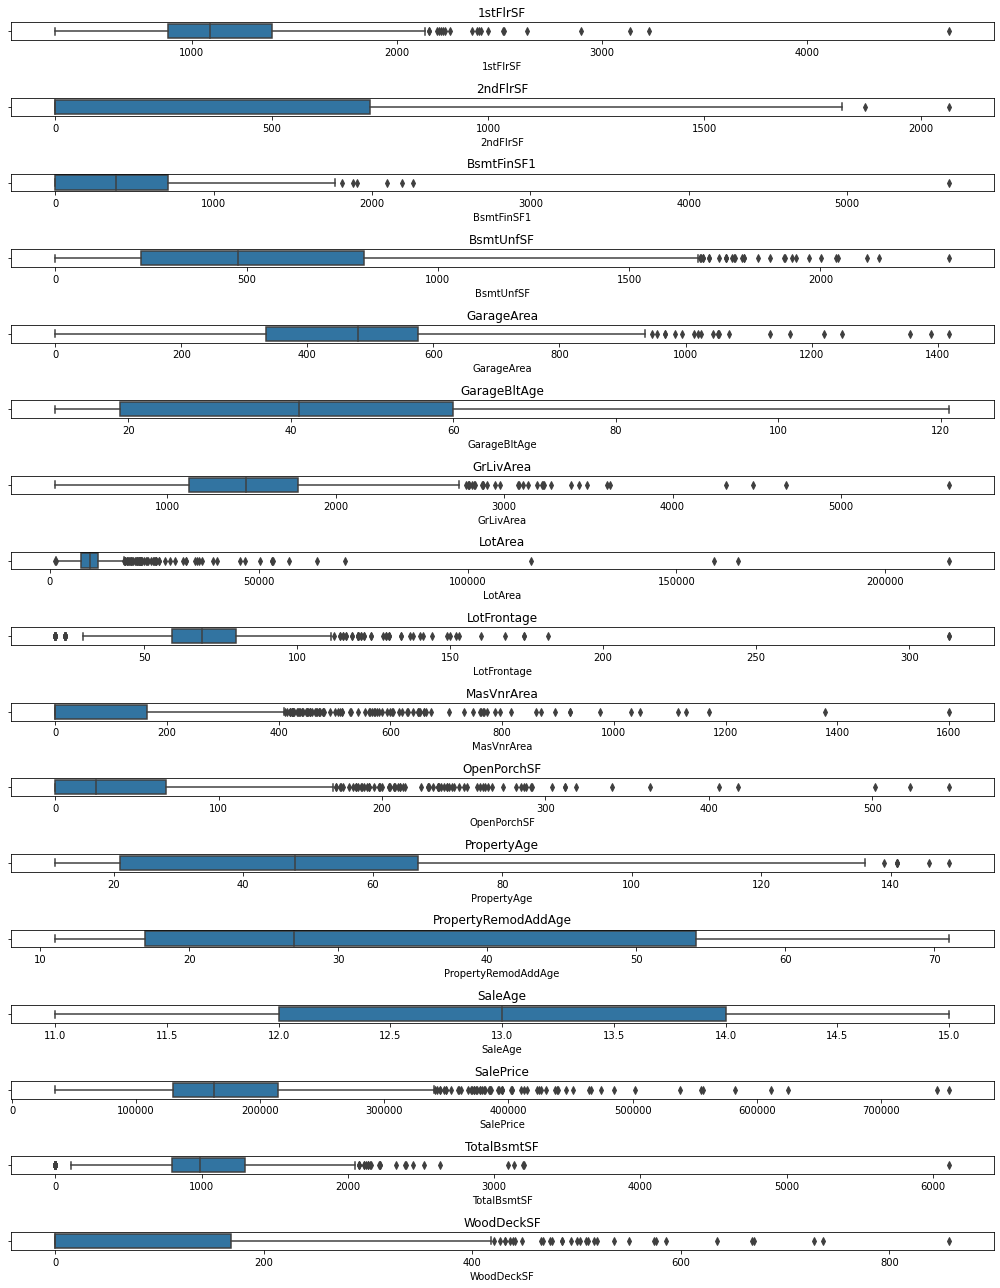

In [42]:
# Generic function to plot outliers based on dataframe and numeric columns
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols), figsize=(14,len(cols)+1))
    for i in range(0,len(cols)):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(df, numerical_features)

In [43]:
def treat_outliers(df, col):
    q1, q3 = np.percentile(df[col].dropna(), [5, 95])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    #print(col, lower_bound, upper_bound)
    df[col][df[col] <= lower_bound] = lower_bound
    df[col][df[col] >= upper_bound] = upper_bound

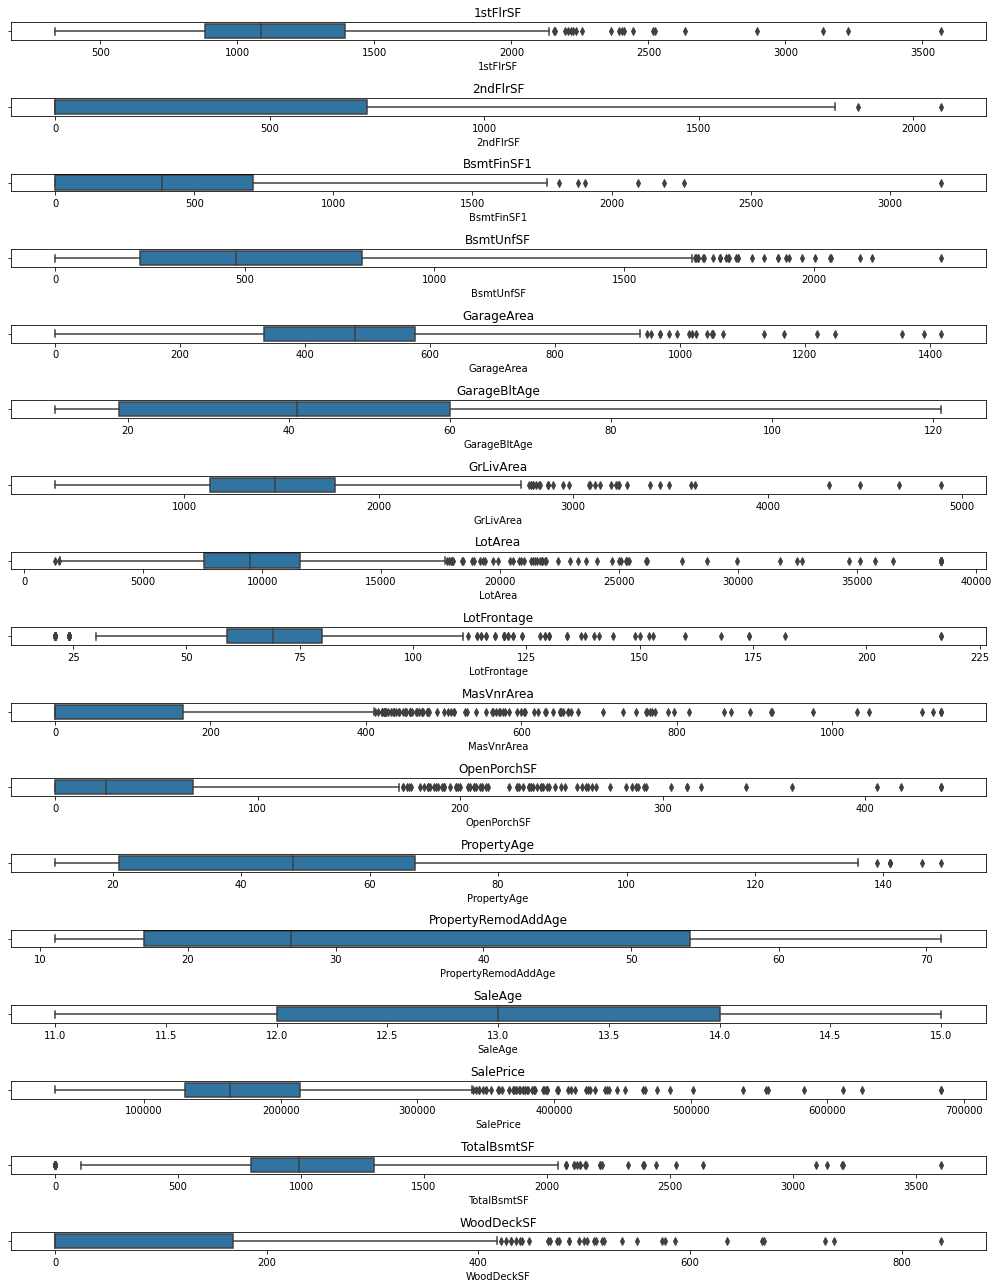

In [44]:
for i in numerical_features:
    treat_outliers(df, i)

check_outliers_continuous(df, numerical_features)

<a id="FADVIV"></a>
### 2.7 Feature Analysis (Numerical & Categorical) - Dependent Variable with Independent Variables

#### Analyzing SalePrice dependent variable

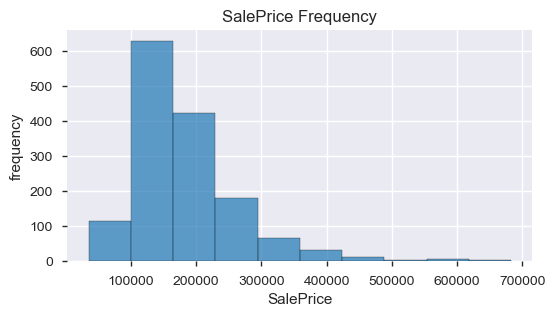

In [ ]:
histogram(df,'SalePrice')

 Data Interpretation for Sale Price Histogram 
- Typically the price ranges between 100000 to 200000

In [ ]:
# Printing the correlation with SalePrice
print(round(df[numerical_features].corr()['SalePrice']*100))

1stFlrSF                62.0
2ndFlrSF                32.0
BsmtFinSF1              40.0
BsmtUnfSF               22.0
GarageArea              63.0
GarageBltAge           -47.0
GrLivArea               71.0
LotArea                 39.0
LotFrontage             35.0
MasVnrArea              47.0
OpenPorchSF             32.0
PropertyAge            -53.0
PropertyRemodAddAge    -51.0
SaleAge                  3.0
SalePrice              100.0
TotalBsmtSF             64.0
WoodDeckSF              33.0
Name: SalePrice, dtype: float64


In [122]:
numerical_features.remove('SalePrice')

##### Visualizing numerical features (Independent Variables) with SalePrice (Dependent Variable)

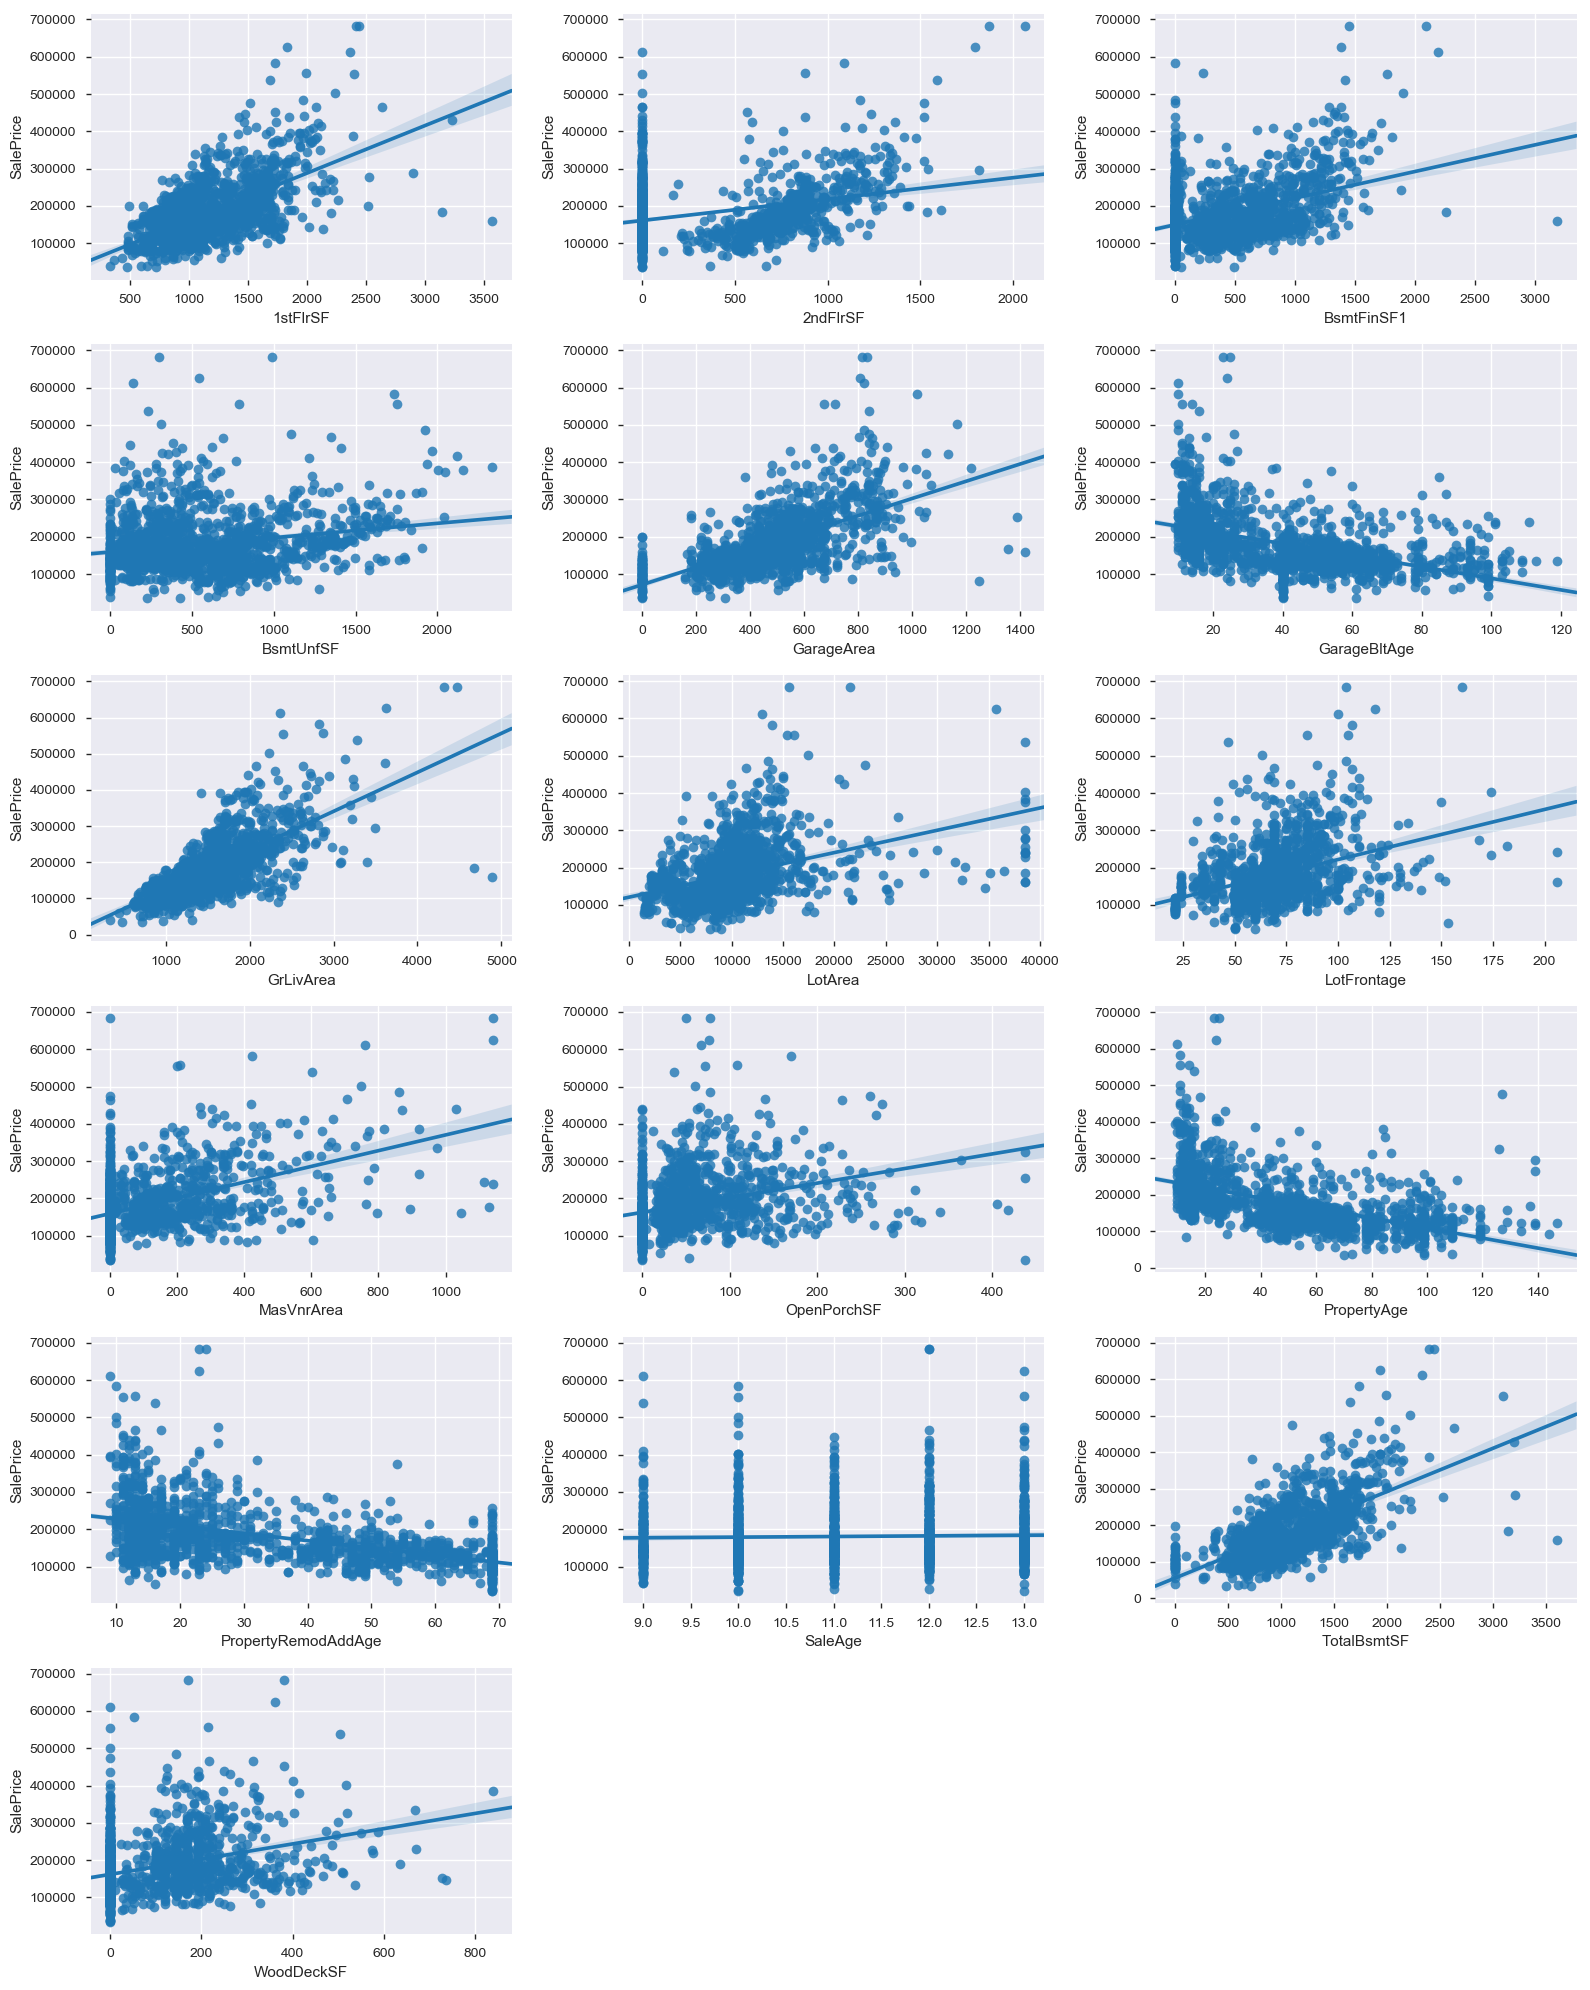

In [ ]:
# Plotting
rows = math.ceil(len(numerical_features) / 3)
plt.figure(figsize=(16,20))
for i in range(0,len(numerical_features)):
    plt.subplot(rows, 3, i+1)
    sns.regplot(x=numerical_features[i],y='SalePrice',data=df)
plt.tight_layout()
plt.show()

 Data Interpretation for Numerical Independent Variables with Dependent Variable  
- PropertyRemodAddAge, PropertyAge, GarageBltAge have a negative correlation with SalePrice
- 2ndFlrSF, MasVnrArea, GarageArea, BsmtUnfSF, GrLivArea, WoodDeckSF, LotArea, BsmtFinSF1, TotalBsmtSF, LotFrontage, OpenPorchSF, 1stFlrSF have a positive correlation with SalePrice
- SaleAge does not seem to have a correlation with SalePrice

##### Visualizing Ordered Categorical Variables (Independent Variables) with SalePrice (Dependent Variable)

In [46]:
# Printing the correlation with SalePrice
corrList = ordered_categorical_features.copy()
corrList.append('SalePrice')
print(round(df[corrList].corr()['SalePrice']*100))

BedroomAbvGr     17.0
BsmtFullBath     23.0
Fireplaces       47.0
FullBath         56.0
GarageCars       64.0
HalfBath         28.0
MoSold            5.0
OverallCond      -8.0
OverallQual      79.0
TotRmsAbvGrd     54.0
SalePrice       100.0
Name: SalePrice, dtype: float64


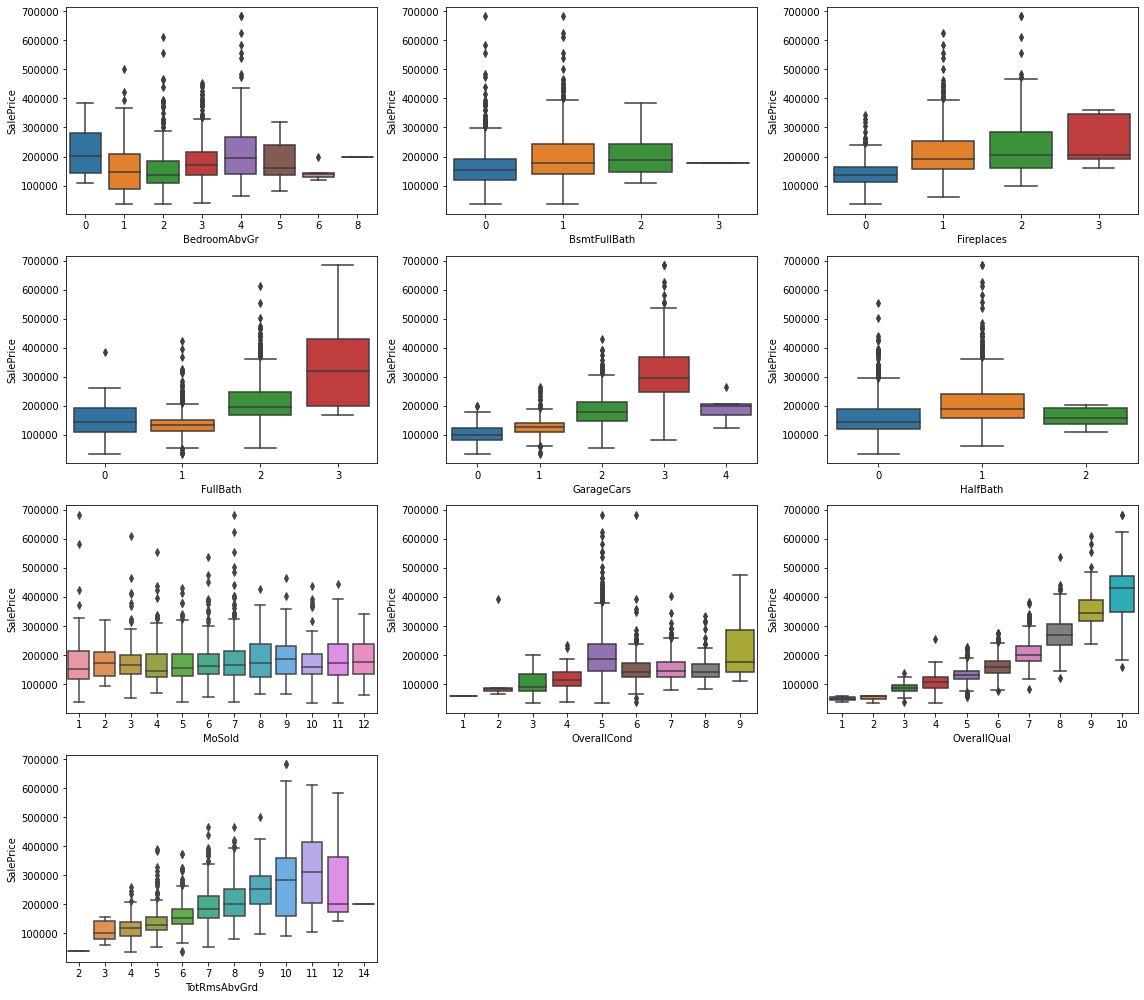

In [47]:
# Plotting
rows = math.ceil(len(ordered_categorical_features) / 3)
plt.figure(figsize=(16,14))
for i in range(0,len(ordered_categorical_features)):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(x=ordered_categorical_features[i],y='SalePrice',data=df)
plt.tight_layout()
plt.show()

 Data Interpretation for Ordered Categorical Independent Variables with Dependent Variable  
- BedroomAbvGr - Sale Price seems consistent across
- BsmtFullBath - Sale Price increase with increase in value. But not much.
- FirePlaces - Sale Price increases from 0 to 2
- FullBath - Sale Price increases from 1 to 3
- GarageCars - Sale Price increases from 0 to 3
- HalfBath - Increase in half bath not impacting the Sale Price much
- MSSubClass - Highest price for 60 (2-STORY 1946 & NEWER). And Lowest for 30 (1-STORY 1945 & OLDER)
- Higher OverallQual (1 to 10) increases the Sale Price. Clear visualization to depict this trend.
- Higher OverallCond (1 to 10) increases the Sale Price
- Higher TotRmsAbvGrd (2 to 11) increases the Sale Price
- MoSold (1 to 12) does not seem to have much impact on Sale Price
<br/><br/>
- Positive and high correlation of SalePrice with GarageCars, TotRmsAbvGrd, OverallQual, Fireplaces, FullPath
- Positive correlation of SalesPrice with BedroomAbvGr, BsmtFullBath, HalfBath but not high
- Negative correlation of SalesPrice with MSSubClass, OverallCond but not high

##### Visualizing Categorical Features (Independent Variables) with SalePrice (Dependent Variable)

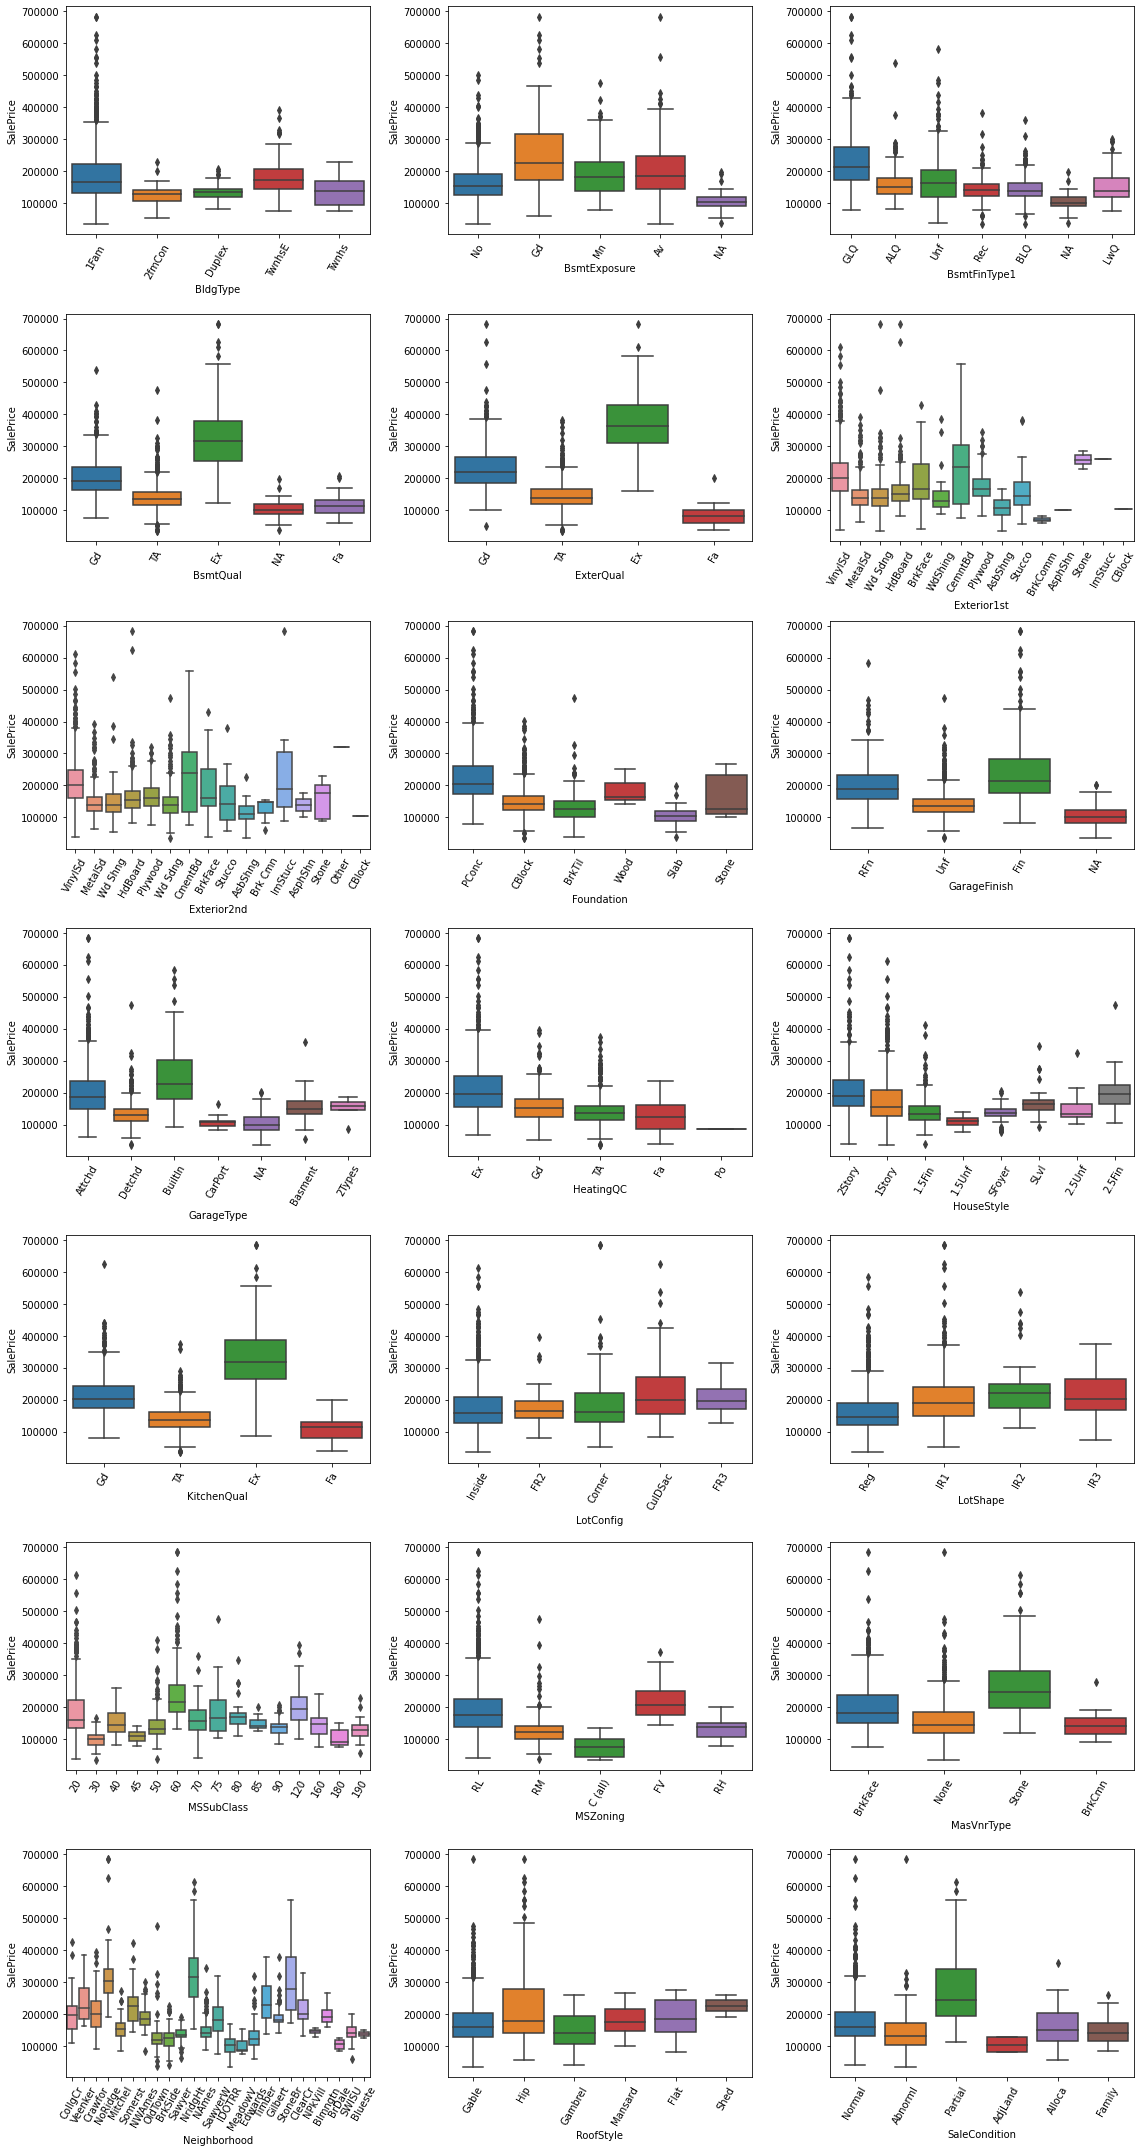

In [48]:
# Plotting
rows = math.ceil(len(categorical_features) / 3)
plt.figure(figsize=(16,30))
for i in range(0,len(categorical_features)):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(x=categorical_features[i],y='SalePrice',data=df)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

 Data Interpretation for Categorical Independent Variables with Dependent Variable  
- **_BldgType_** 
	- 1Fam seems to have outliers and higher Sale Price entries
	- Largely price seems consistent


- **_BsmtExposure_** (Refers to walkout or garden level walls)
	- Gd (Good Exposure) has higher Sale Price. Beyond 200000.
	- NA (No Basement) has lower Sale Price. Around 100000.
    - It is an Ordered Categorical Variable


- **_BsmtFinType1_** (Rating of basement finished area)
	- GLQ (Good Living Quarters) has higher Sale Price. Beyond 200000.
	- NA (No Basement) has lower Sale Price. Around 100000.


- **_BsmtQual_** (Evaluates the height of the basement)
	- Ex (Excellent (100+ inches)) has a clearly higher Sale Price. Beyond 300000.
	- NA (No Basement) has lower Sale Price. Around 100000.
    - It is an Ordered Categorical Variable


- **_ExterQual_** (Evaluates the quality of the material on the exterior)
	- Ex (Excellent) has Sale Price close to 400000
	- Fa (Fair) has Sale Price close to 100000
	- It is an Ordered Categorical Variable


- **_Exterior1st_** (Exterior covering on house)
	- CemntDb (Cement Board) typically has high Sale Price. Beyond 250000
	- BrkComm(Brick Common) seems to have lower Sale Price. Under 100000


- **_Exterior2nd_** (Exterior covering on house (if more than one material))
	- CemntDb (Cement Board) typically has high Sale Price. Beyond 250000


- **_Foundation_**
	- PConc (Poured Contrete) has Sale Price typically beyond 200000.
	- Slab has Sale Price around 100000.


- **_GarageFinish_** (Interior finish of the garage)
	- Fin (Finished) and RFn (Roughly Finished) has higher Sale Price. Beyond 200000
	- NA (No Garage) has Sale Price around 100000.


- **_GarageType_** (Garage location)
	- BulitIn has price beyond 200000
	- CarPort and NA (No Garage) has price hovering around 100000


- **_HeathQC_** (Heating quality and condition)
	- Ex (Excellent) fetches Sale Price around 200000
	- Po (Poor) fetches Sale Price around 100000


- **_HouseStyle_** (Style of dwelling)
	- 2Story (Two story) and 2.5Fin (Two and one-half story: 2nd level finished) seems to have higher Sale Price
	- 1.5Unf (One and one-half story: 2nd level unfinished) seems to have lowest Sale Price


- **_KitchenQual_**
	- Ex (Excellent) has Sale Price beyond 300000
	- Fa (Fair) has Sale Price around 100000
	- It is an Ordered Categorical Variable


- **_LotConfig_**
	- Sale Price almost same across categories.


- **_LotShape_**
	- Sale Price lowest for Reg (Regular)
	- Price almost consistent for all other categories.


- **_MSZoning_**
	- Sale Price highest with RL (Residential Low Density) and FV(Floating Village Residential).
	- Sale Price lowest with C(all) ==> Commerical


- **_MasVnrType**_
	- Sale Price highest for Stone. Beyond 200000.


- **_Neighborhood_** (Physical locations within Ames city limits)
	- StoneBr (Stone Brook), NridgHt (Northridge Heights), NoRidge (Northridge) are the neighbourhoods having highest Sale Price. Above 250000
	- IDOTRR (Iowa DOT and Rail Road), BrDale (Briardale), OldTown, BrkSide (Brookside), MeadowV (Meadow Village) neighbourhoods have the lowest Sale Price. Around 100000


- **_RoofStyle_** 
	- Shed seems to have higher Sale Price. Beyond 200000.


- **_SaleCondition_**
	- Partial seems to hvae higher Sale Price. Beyond 200000.

##### Deriving New Boolean Features & Analysis with Dependent Variable

In [123]:
# Has Second Floor
df['Has2ndFlr'] = df['2ndFlrSF'] > 0
df.loc[df['Has2ndFlr'], ['Has2ndFlr']] = 1
df.loc[df['Has2ndFlr'] != True, ['Has2ndFlr']] = 0
df[['Has2ndFlr','2ndFlrSF']].head()

Has2ndFlr  2ndFlrSF
0         1       854
1         0         0
2         1       866
3         1       756
4         1      1053

In [124]:
# Has Basement
df['HasBsmt'] = df['BsmtExposure'] != 'NA'
df.loc[df['HasBsmt'], ['HasBsmt']] = 1
df.loc[df['HasBsmt'] != True, ['HasBsmt']] = 0
df[['HasBsmt','BsmtExposure']].head()

HasBsmt BsmtExposure
0       1           No
1       1           Gd
2       1           Mn
3       1           No
4       1           Av

In [125]:
# Has Garage
df['HasGarage'] = df['GarageType'] != 'NA'
df.loc[df['HasGarage'], ['HasGarage']] = 1
df.loc[df['HasGarage'] != True, ['HasGarage']] = 0
df[['HasGarage','GarageType']].head()

HasGarage GarageType
0         1     Attchd
1         1     Attchd
2         1     Attchd
3         1     Detchd
4         1     Attchd

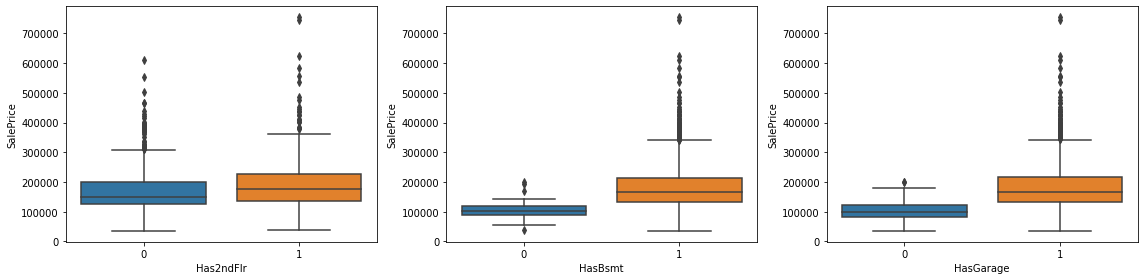

In [126]:
# Plotting box plots
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x='Has2ndFlr',y='SalePrice',data=df)
plt.subplot(132)
sns.boxplot(x='HasBsmt',y='SalePrice',data=df)
plt.subplot(133)
sns.boxplot(x='HasGarage',y='SalePrice',data=df)
plt.tight_layout()
plt.show()

 Derived Boolean Feature Analysis with Sale Price 
- Has2ndFlr boolean True or False does not seem to have an huge impact on the Sale Price.
- HasBsmt True value increases the Sale Price of the property.
- HasGarage True value increase the Sale Price of the property.

<a id="NFA"></a>
### 2.8 Numerical Feature Analysis

<a id="NFUA"></a>
#### 2.8.1 Numerical Features - Univariate Analysis

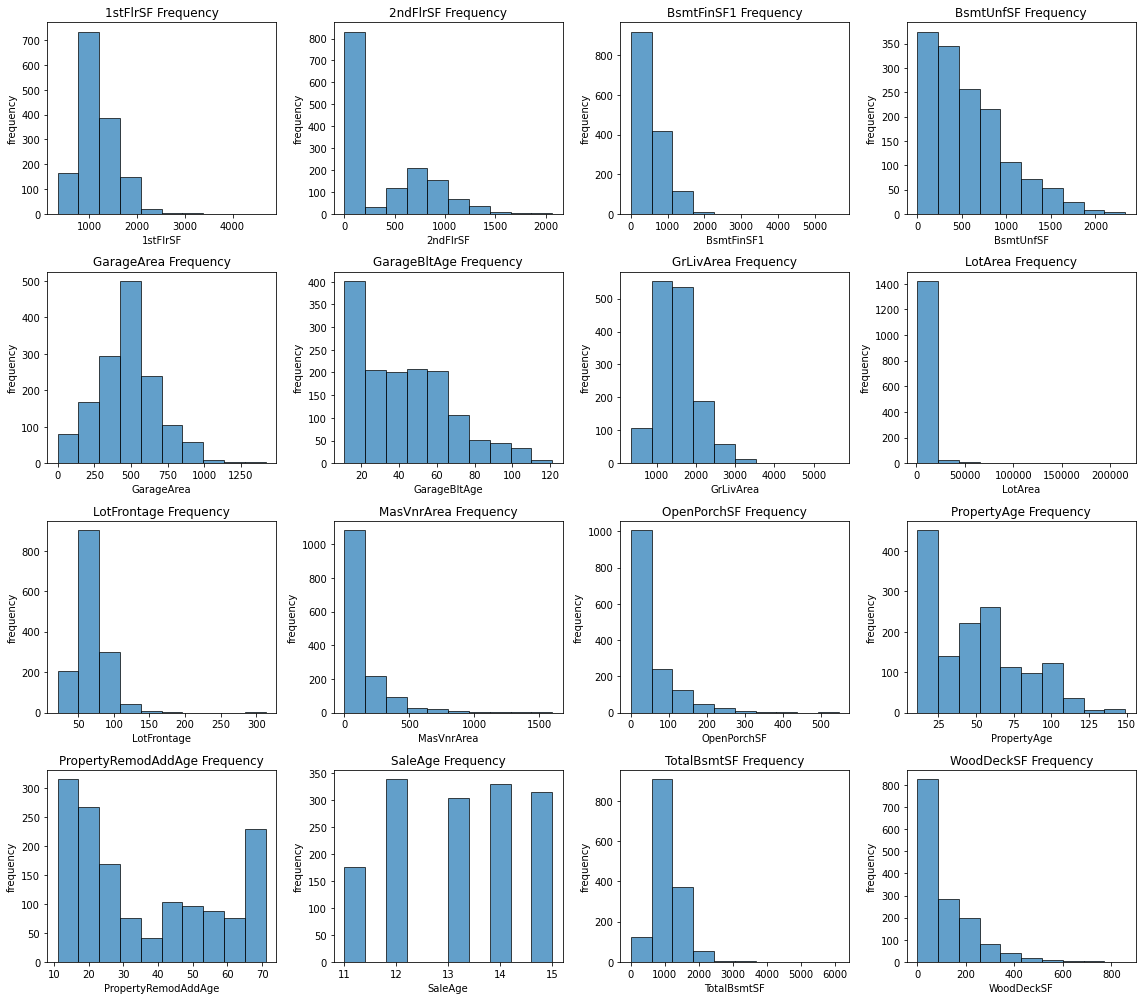

In [127]:
# Plotting
rows = math.ceil(len(numerical_features) / 4)
plt.figure(figsize=(16,14))
for i in range(0,len(numerical_features)):
    plt.subplot(rows, 4, i+1)
    plt.hist(df[numerical_features[i]],alpha=0.7, ec='black')
    plt.xlabel(numerical_features[i])
    plt.ylabel('frequency')
    plt.title(numerical_features[i] + ' Frequency')
plt.tight_layout()
plt.show()

 Data Interpretation for Univariate Analysis of Numerical Features 
- **_PropertyRemodAddAge_** ==> 10 to 20 years of recent modifications of properties has the highest frequency.
- **_PropertyAge_** ==> Typically properties are under 20 years old
- **_2ndFlrSF_** ==> Value of 0, suggesting no second floor has highest frequency. Typically if 2nd Floor exists then the value ranges between 500 to 1000. Maybe a feature can be drived like "**Has2ndFlr**"
- **_MasVnrArea_** ==> Value of 0, suggesting no masonry area has highest frequency. Typically if Masonry Area exists then the value ranges between 100 to 400.
- **_GarageArea_** ==> Seems normally distributed with values mostly ranging between 400 to 800
- **_BsmtUnfSF_** ==> Frequency steadily decreasing with values
- **_GrLivArea_** ==> Values range between 1000 to 2000
- **_WoodDeckSF_** ==> Value of 0, suggesting no Wood Deck has highest frequency. Typically if WoodDeck exists then the value ranges between 100 to 200.
- **_LotArea_** => Values ranging mostly between 500 to 15000 with highest frequency at 10000
- **_GarageBltAge_** ==> Between 20 to 60 years is the typical frequency.
- **_BsmtFinSF1_** ==> Frequency steadily decreasing with values
- **_TotalBsmtSF_** ==> Seems normally distributed with values mostly ranging between 500 to 15000
- **_LotFrontage_** ==> Ranges between 50 to 100 with highest frequency around 75
- **_OpenPorchSF_** ==> Value of 0, suggesting no OpenPorch. Also, value decreasing.
- **_SaleAge_** ==> Consistent frequency across records. Ranging between 9 to 13

<a id="CA"></a>
#### 2.8.2 Correlation Analysis - Bivariate Analysis
Correlation of Independent Variables (x)

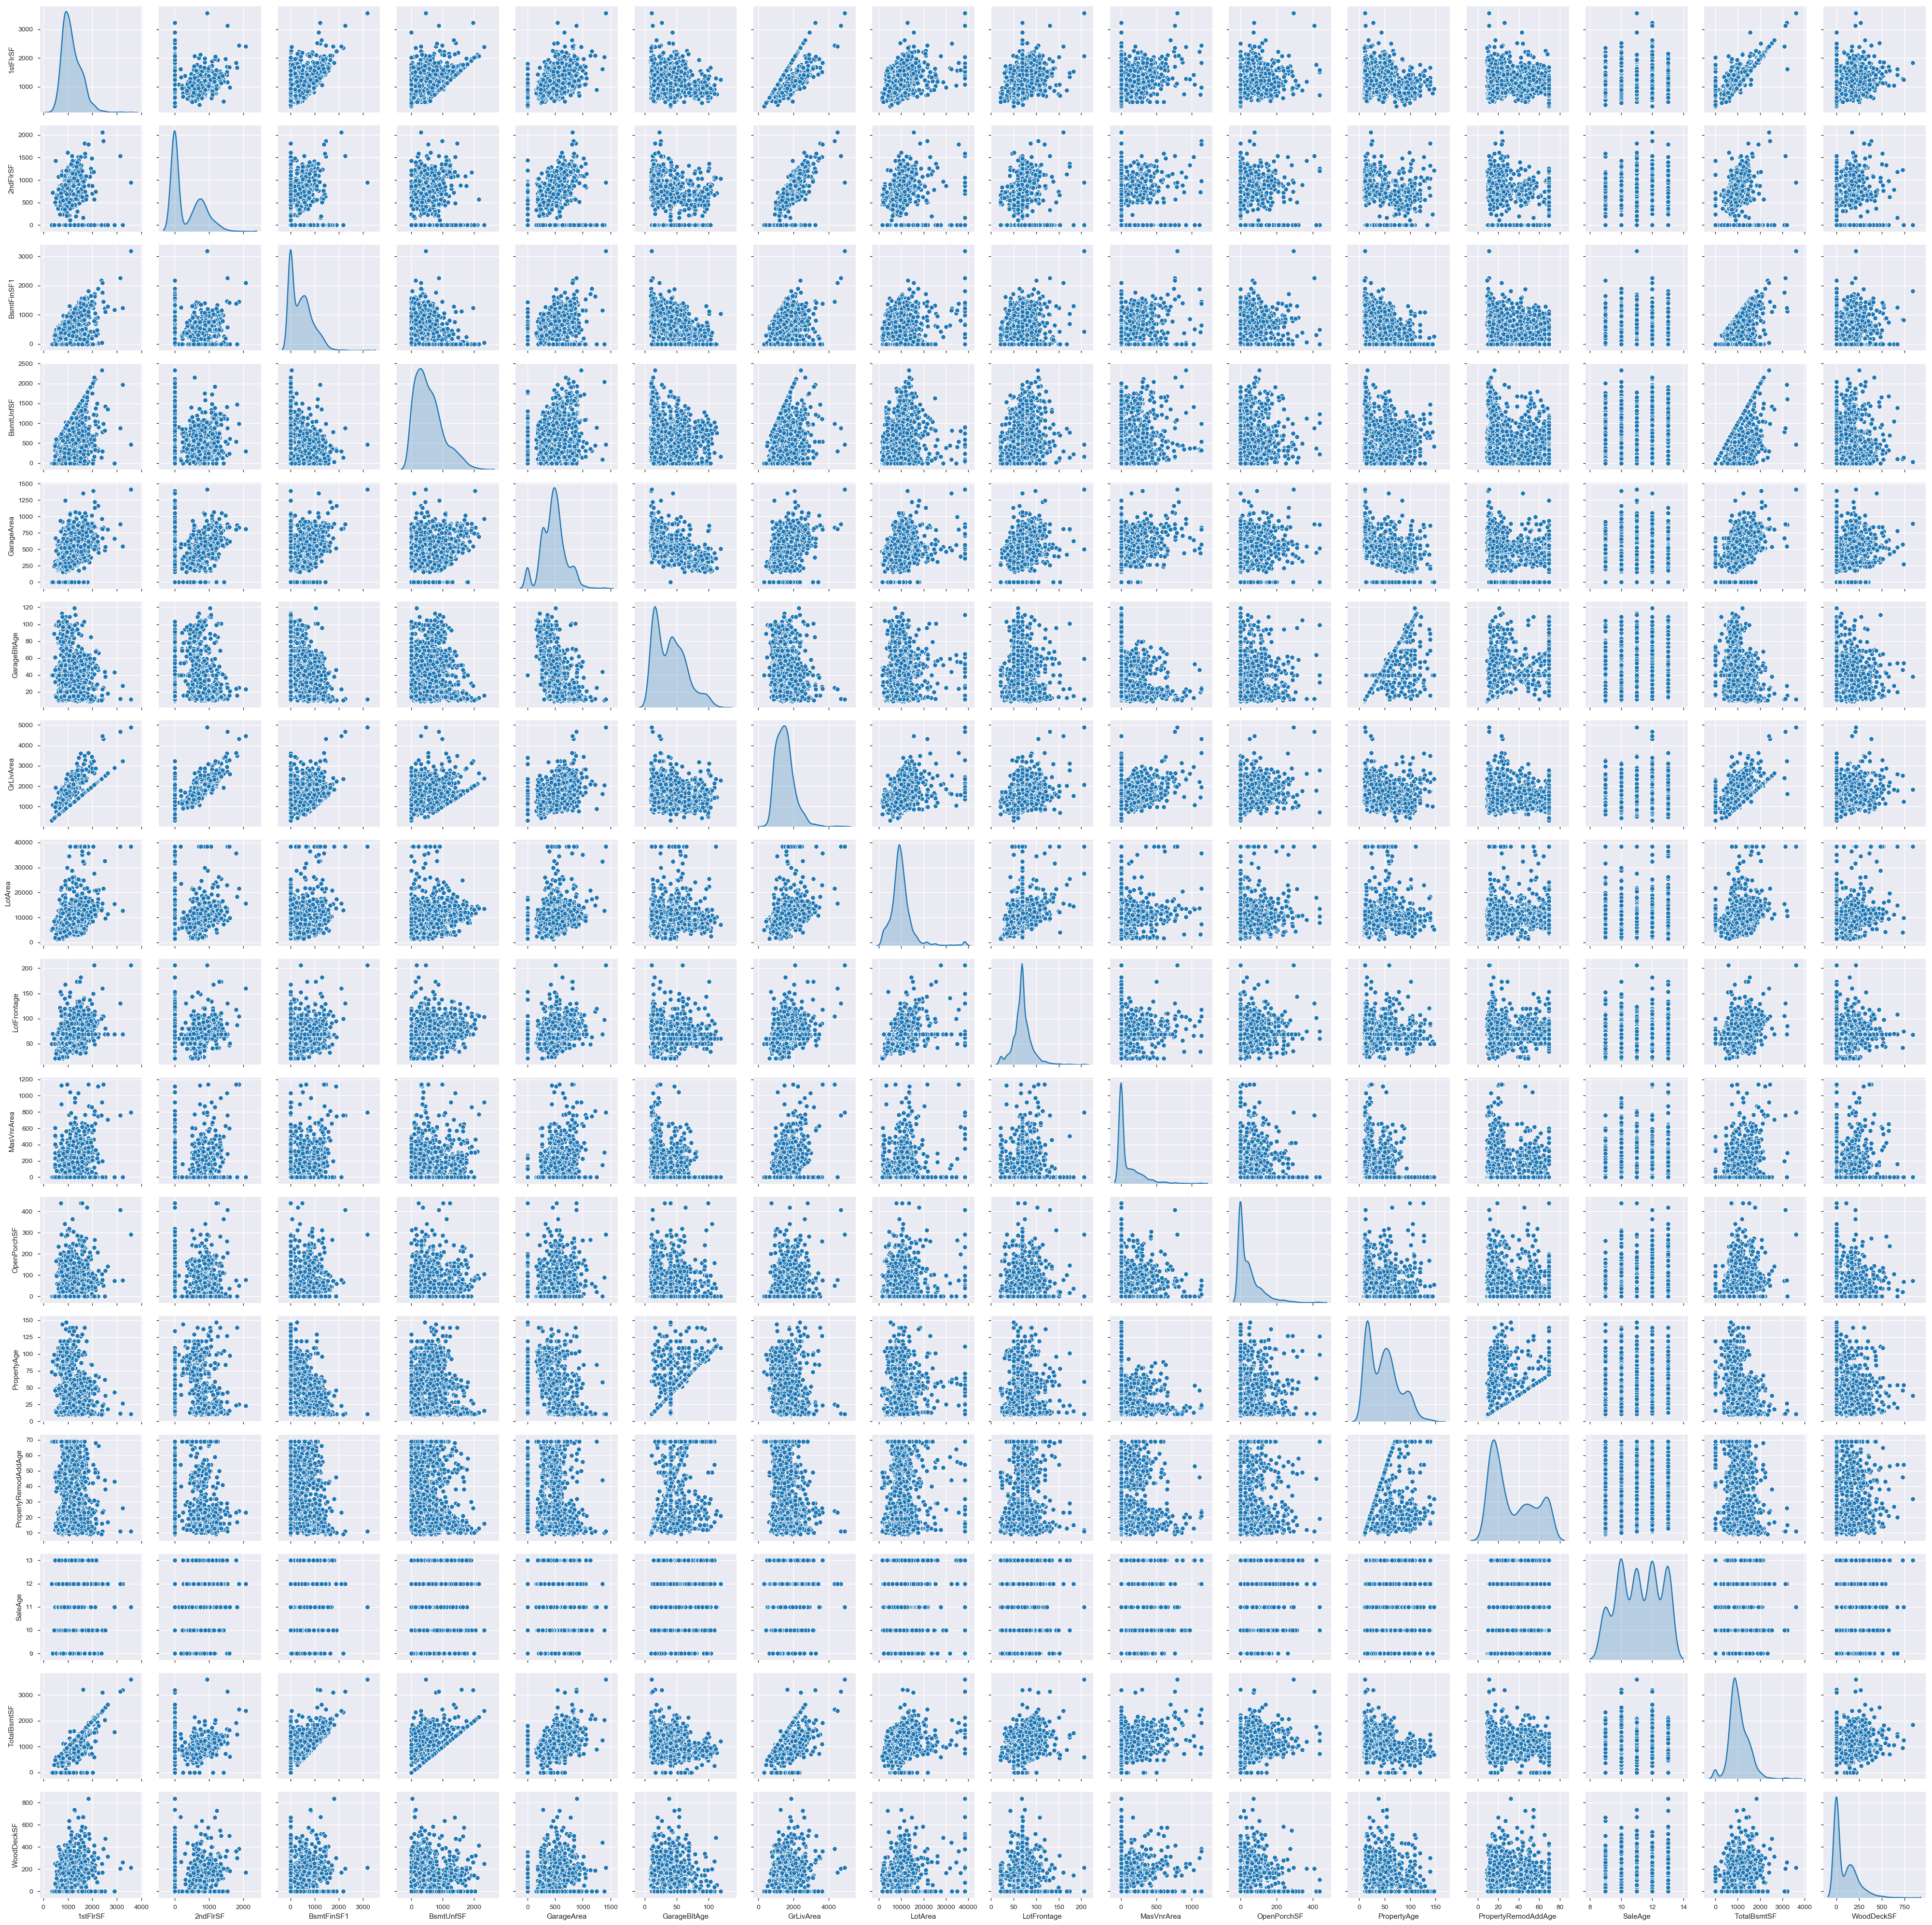

In [ ]:
# Plotting pair plot to view correlation for numerical features
sns.pairplot(df[numerical_features], diag_kind = "kde")
plt.show()

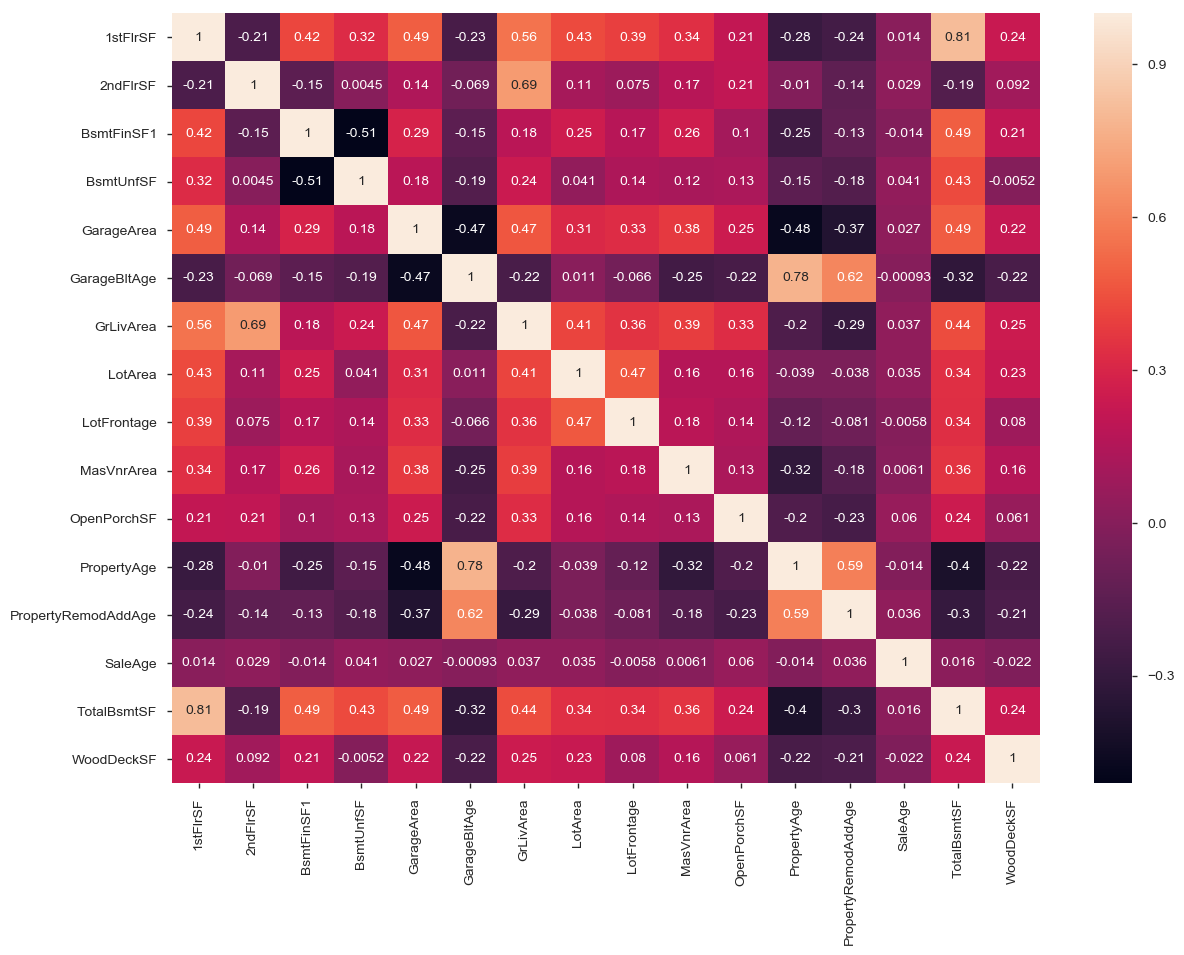

In [ ]:
#plotting a heat map to view correlation
plt.figure(figsize=(14,10))
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.show()

In [128]:
def topcorr(df,cols):
    df_corr = pd.DataFrame(round(df[cols].corr()*100).unstack().reset_index())
    df_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'}, inplace=True)
    df_corr = df_corr[df_corr['Feature_1'] != df_corr['Feature_2']]
    df_corr = df_corr[df_corr['Feature_1'] != 'price']
    df_corr = df_corr[df_corr['Feature_2'] != 'price']
    df_corr.drop_duplicates(subset='Correlation', inplace=True)
    print("TOP 10 HIGH POSITIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=False).head(10))
    print("\nTOP 10 HIGH NEGATIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=True).head(10))

topcorr(df,numerical_features)

TOP 10 HIGH POSITIVE CORRELATION % 

        Feature_1            Feature_2  Correlation
14       1stFlrSF          TotalBsmtSF         82.0
91   GarageBltAge          PropertyAge         78.0
22       2ndFlrSF            GrLivArea         69.0
92   GarageBltAge  PropertyRemodAddAge         62.0
188   PropertyAge  PropertyRemodAddAge         59.0
6        1stFlrSF            GrLivArea         57.0
46     BsmtFinSF1          TotalBsmtSF         52.0
4        1stFlrSF           GarageArea         49.0
70     GarageArea            GrLivArea         47.0
2        1stFlrSF           BsmtFinSF1         45.0

TOP 10 HIGH NEGATIVE CORRELATION % 

        Feature_1            Feature_2  Correlation
35     BsmtFinSF1            BsmtUnfSF        -50.0
75     GarageArea          PropertyAge        -48.0
69     GarageArea         GarageBltAge        -47.0
190   PropertyAge          TotalBsmtSF        -39.0
76     GarageArea  PropertyRemodAddAge        -37.0
94   GarageBltAge          TotalBsmtSF   

 Data Interpretation for Correlation Analysis 
 - High correlation features are:
    - 1stFlrSF and TotalBsmtSF
    - PropertyAge and GarageBltAge
    - 2ndFlrSF and GrLivArea
    - PropertyRemodAddAge and GarageBltAge
    - PropertyAge and PropertyRemodAddAge
    - 1stFlrSF and GrLivArea
    - BsmtFinSF1 and BsmtUnfSF

<a id="CFA"></a>
### 2.9 Categorical Feature Analysis

<a id="CFUA"></a>
#### 2.9.1 Categorical Features - Univariate Analysis

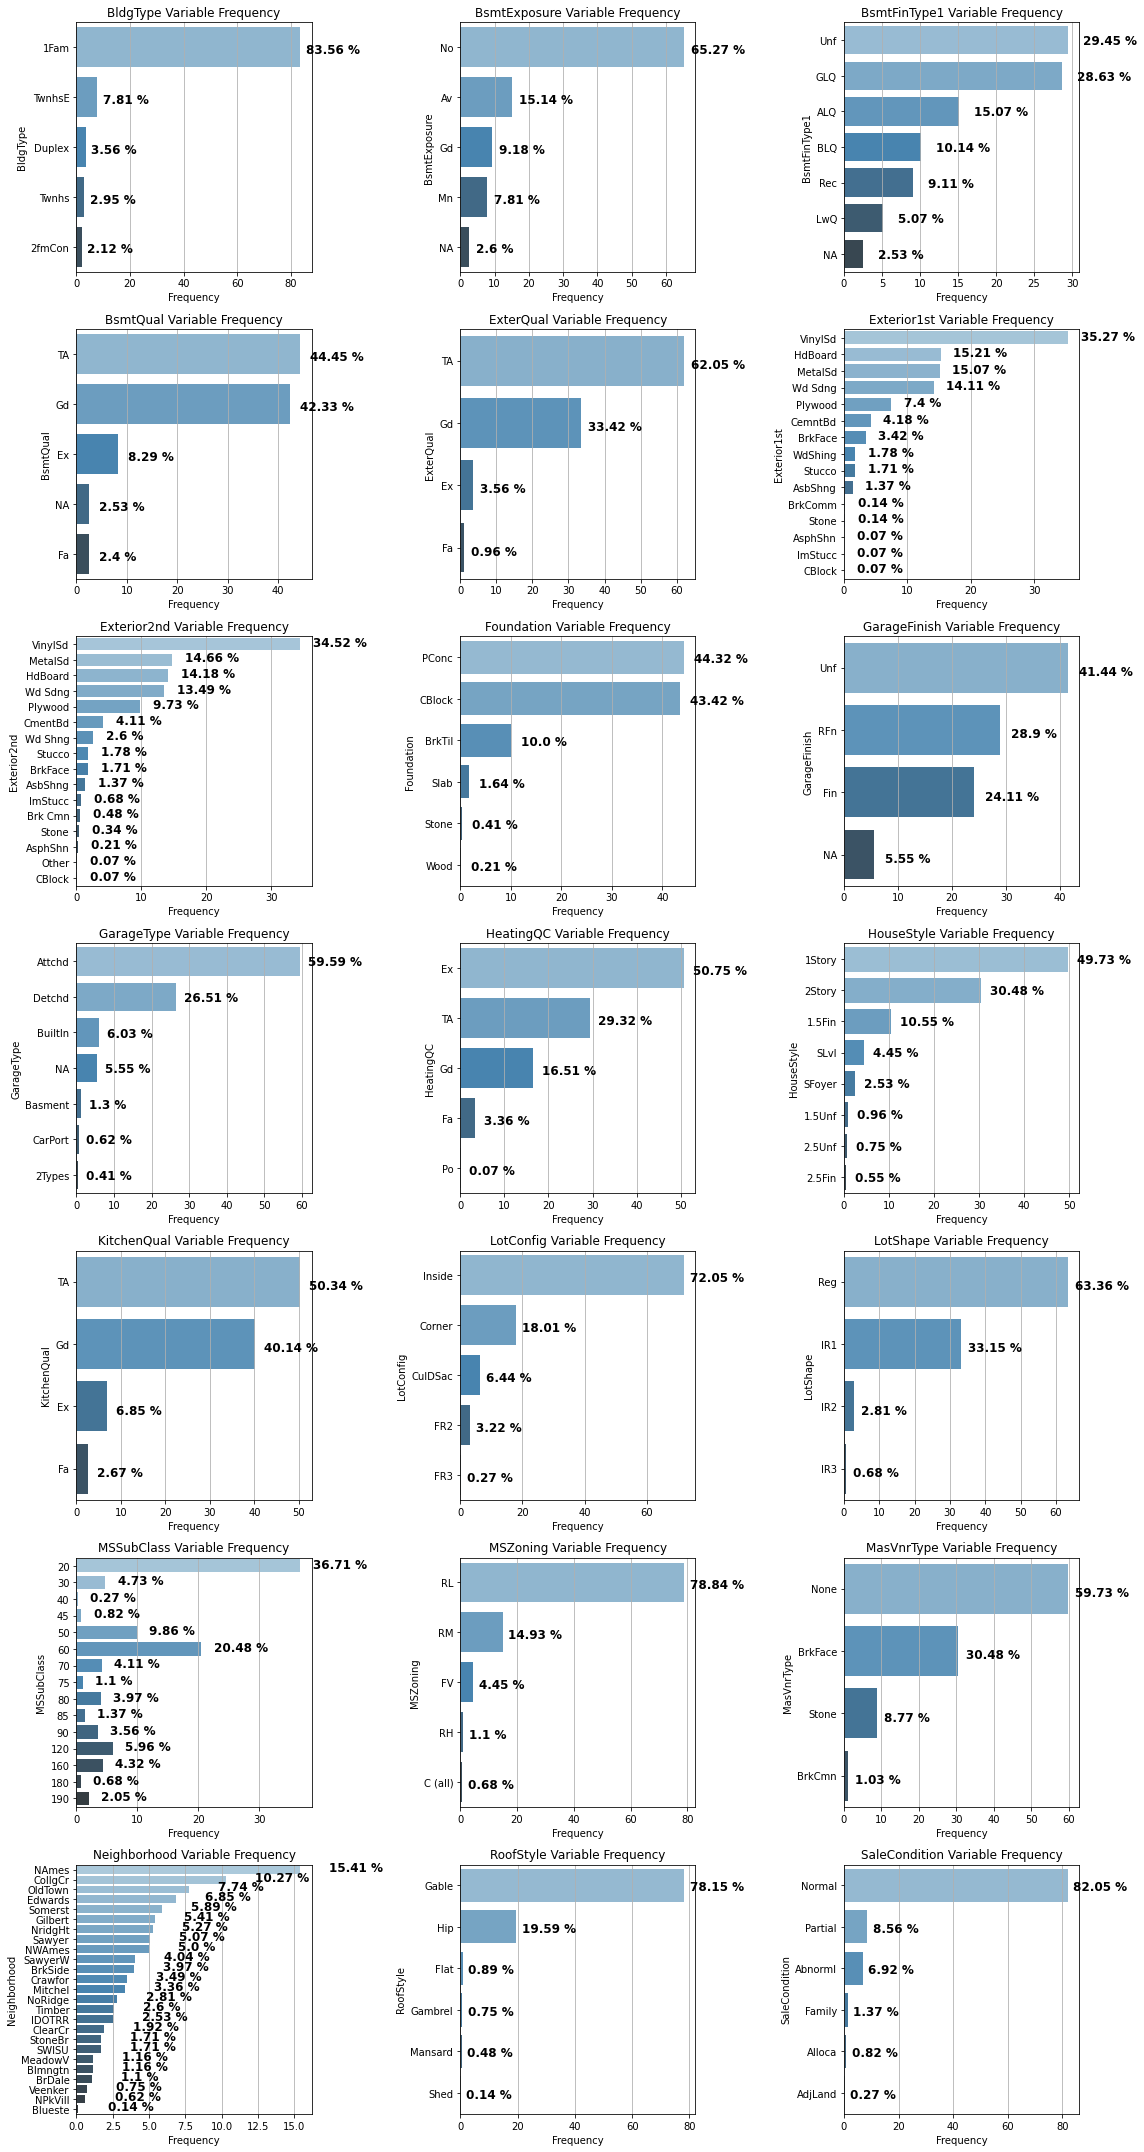

In [54]:
# Plotting
rows = math.ceil(len(categorical_features) / 3)
plt.figure(figsize=(16,30))
for i in range(0,len(categorical_features)):
    plt.subplot(rows, 3, i+1)
    ser = np.round((df[categorical_features[i]].value_counts()/len(df[categorical_features[i]]))*100,2)
    ax = sns.barplot(x=ser.values, y=ser.index, orient="h", palette=("Blues_d"))
    ax.title.set_text(categorical_features[i] + " Variable Frequency")
    ax.set(ylabel=categorical_features[i])
    ax.set(xlabel='Frequency')
    ax.grid(True, axis="x")
    for i in ax.patches:
        ax.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

 Categorical Variables Univarite Analysis 
- All features having a value occurence of 85% were removed, thereby giving better frequency distribution.

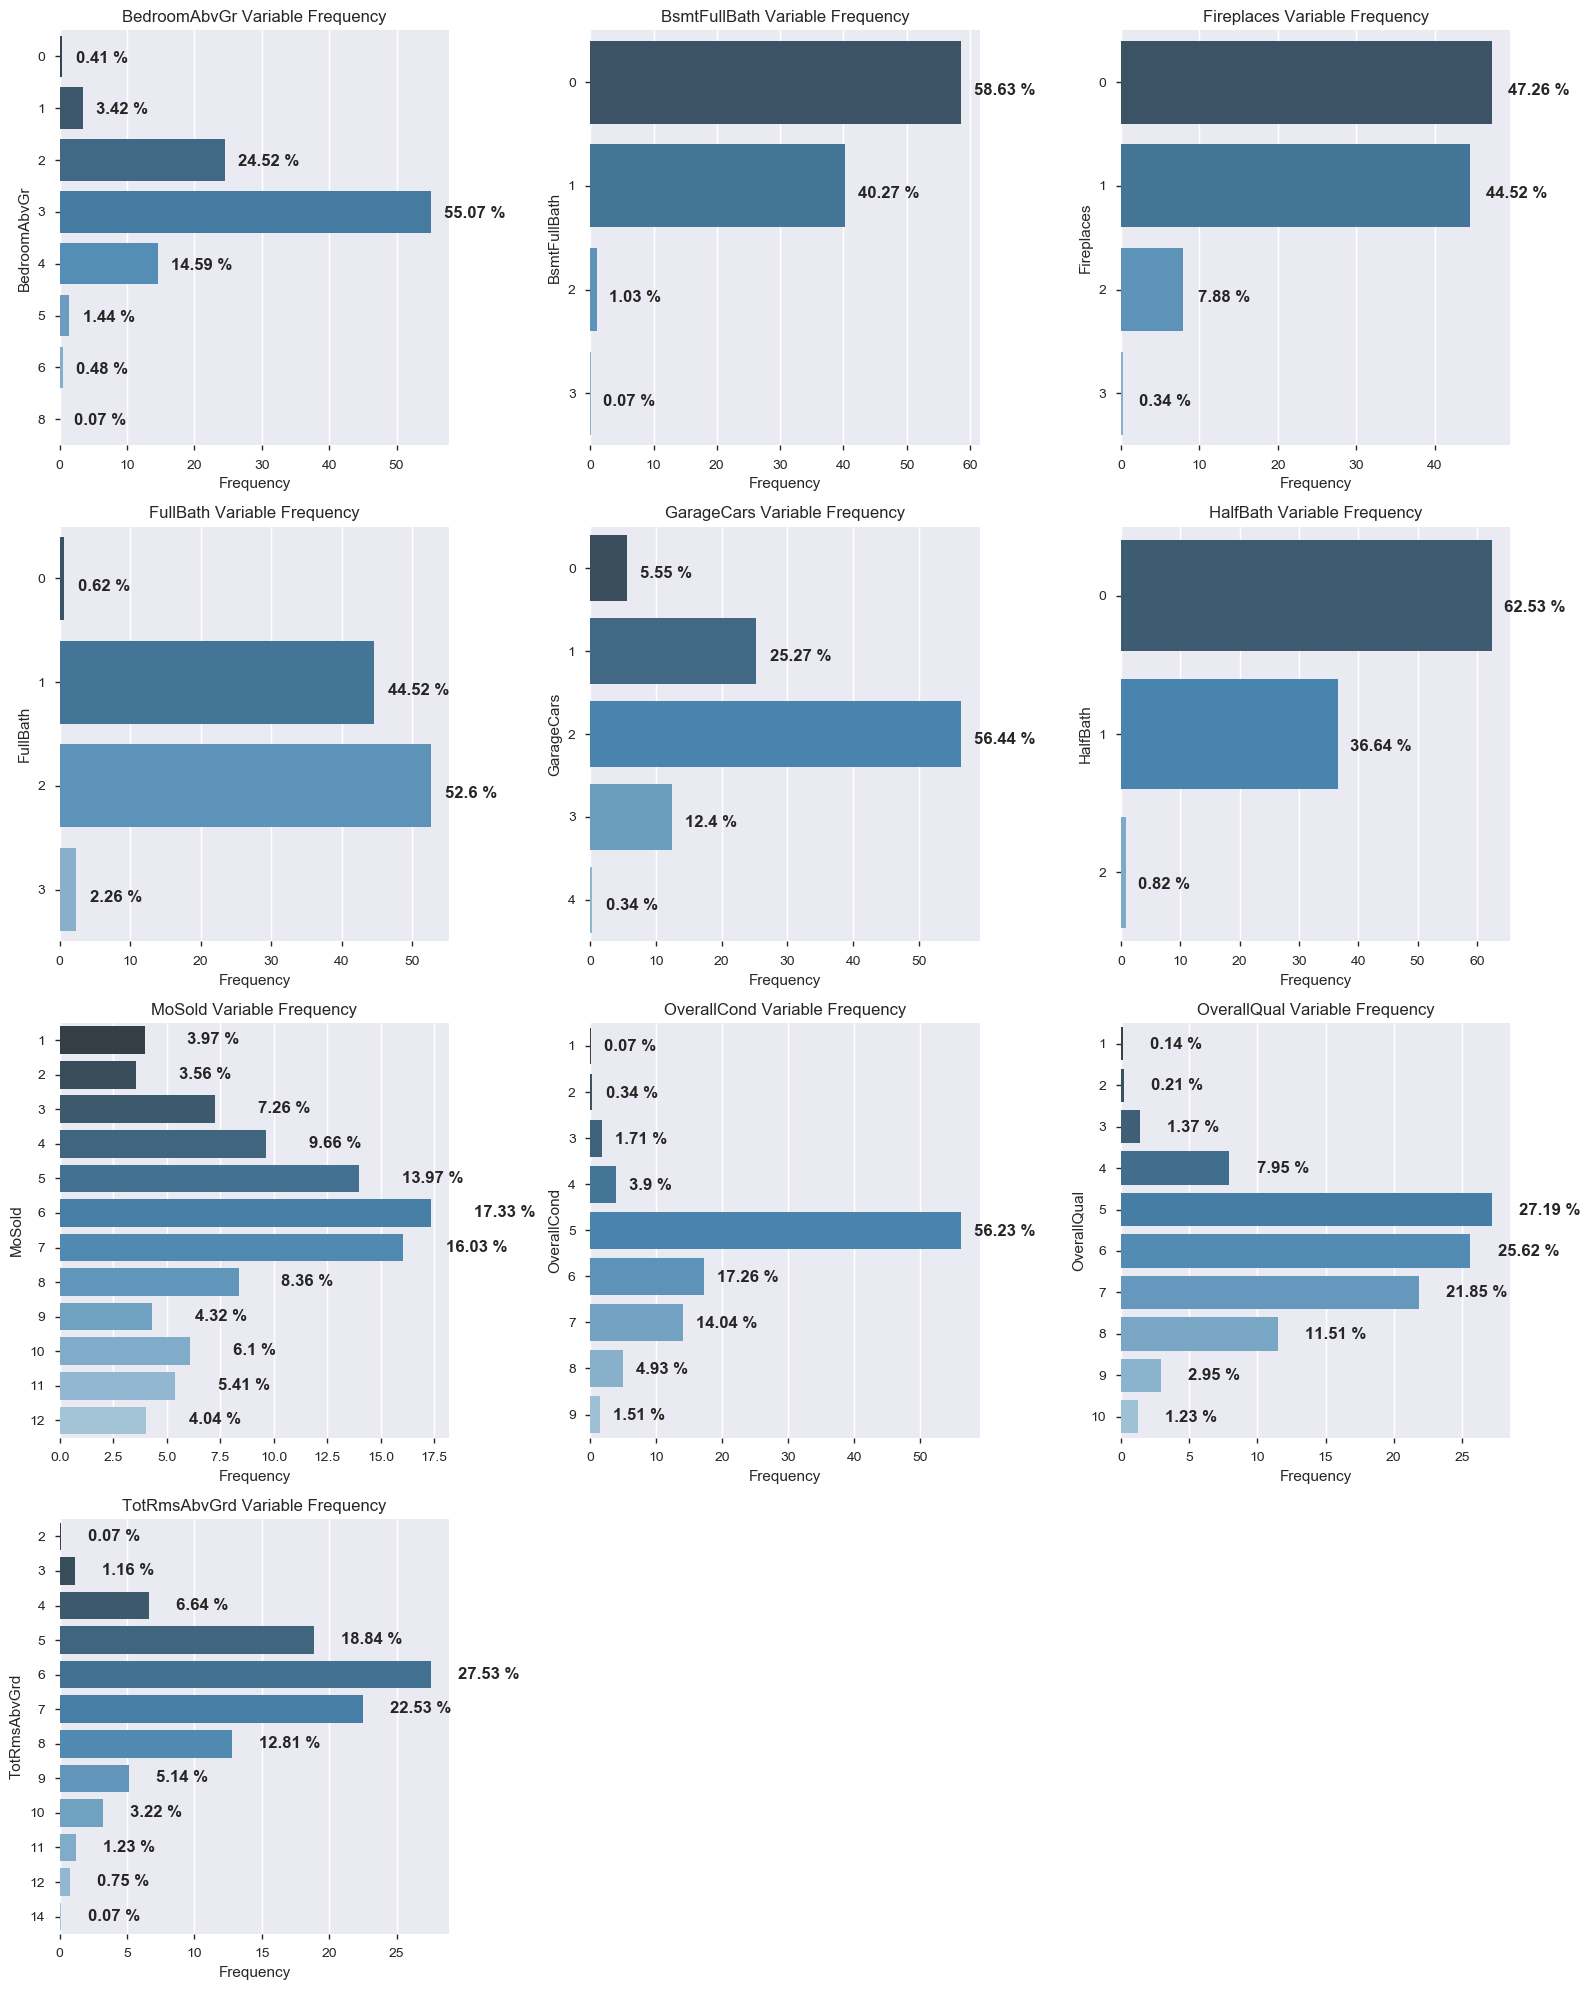

In [ ]:
# Plotting
rows = math.ceil(len(ordered_categorical_features) / 3)
plt.figure(figsize=(16,20))
for i in range(0,len(ordered_categorical_features)):
    plt.subplot(rows, 3, i+1)
    ser = np.round((df[ordered_categorical_features[i]].value_counts()/len(df[ordered_categorical_features[i]]))*100,2)
    ax = sns.barplot(x=ser.values, y=ser.index, orient="h", palette=("Blues_d"))
    ax.title.set_text(ordered_categorical_features[i] + " Variable Frequency")
    ax.set(ylabel=ordered_categorical_features[i])
    ax.set(xlabel='Frequency')
    ax.grid(True, axis="x")
    for i in ax.patches:
        ax.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

 Data Interpretation Ordered Categorical Variables Univarite Analysis 
- All features having a value occurence of 85% were removed, thereby giving better frequency distribution.

<a id="FEDP"></a>
# 3. Feature Engineering - Data Preparation

In [129]:
# Getting a copy of dataframe for better organization. Acts as a checkpoint for the dataframe
df_prep = df.copy()

<a id="LE"></a>
### 3.1 Label Encoding - Ordered Categorical Variables

In [130]:
df_prep['BsmtExposure'] = df_prep['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df_prep['BsmtQual'] = df_prep['BsmtQual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_prep['KitchenQual'] = df_prep['KitchenQual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_prep['ExterQual'] = df_prep['ExterQual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_prep['HeatingQC'] = df_prep['HeatingQC'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

categorical_features.remove('BsmtExposure')
categorical_features.remove('BsmtQual')
categorical_features.remove('KitchenQual')
categorical_features.remove('ExterQual')
categorical_features.remove('HeatingQC')

ordered_categorical_features.append('BsmtExposure')
ordered_categorical_features.append('BsmtQual')
ordered_categorical_features.append('KitchenQual')
ordered_categorical_features.append('ExterQual')
ordered_categorical_features.append('HeatingQC')
df_prep.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0          4      PConc   
1     MetalSd     MetalSd       None         0.0          3     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0          4      PConc   
3     Wd Sdng     Wd Shng       None         0.0          3     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0          4      PConc   

   BsmtQual  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1          GLQ         706        150          856   
1         4             4          ALQ         978        284         1262   
2         4             2          GLQ         486        434          920   
3         3             1          ALQ         216        540          756   
4         4             3          GLQ         655        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          5       856       854       1710             1         2         1   
1          5      1262         0       1262             0         2         0   
2          5       920       866       1786             1         2         1   
3          4       961       756       1717             1         1         0   
4          5      1145      1053       2198             1         2         1   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  \
0             3            4             8           0     Attchd   
1             3            3             6           1     Attchd   
2             3            4             6           1     Attchd   
3             3            4             7           1     Detchd   
4             4            4             9           1     Attchd   

  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
0          RFn           2         548           0           61       2   
1          RFn           2         460         298            0       5   
2          RFn           2         608           0           42       9   
3          Unf           3         642           0           35       2   
4          RFn           3         836         192           84      12   

  SaleCondition  SalePrice  GarageBltAge  PropertyAge  PropertyRemodAddAge  \
0        Normal     208500            18           18                   18   
1        Normal     181500            45           45                   45   
2        Normal     223500            20           20                   19   
3       Abnorml     140000            23          106                   51   
4        Normal     250000            21           21                   21   

   SaleAge Has2ndFlr HasBsmt HasGarage  
0       13         1       1         1  
1       14         0       1         1  
2       13         1       1         1  
3       15         1       1         1  
4       13         1       1         1

In [131]:
print(ordered_categorical_features)

['BedroomAbvGr', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath', 'MoSold', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'BsmtExposure', 'BsmtQual', 'KitchenQual', 'ExterQual', 'HeatingQC']


<a id="DC"></a>
### 3.2 Dummy Encoding - Creating dummy variables for the Categorical Columns

In [132]:
# Create dummy columns for categorical variables. Create dummy dataframe, remove 1st column and concat with original df
for i in categorical_features:
    dummy_df = pd.get_dummies(df_prep[i], prefix=i, drop_first=True)
    df_prep = pd.concat([df_prep, dummy_df], axis=1)
    df_prep.drop(i,axis=1,inplace=True)
    
df_prep.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
0   1         65.0     8450            7            5       196.0          4   
1   2         80.0     9600            6            8         0.0          3   
2   3         68.0    11250            7            5       162.0          4   
3   4         60.0     9550            7            5         0.0          3   
4   5         84.0    14260            8            5       350.0          4   

   BsmtQual  BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0         4             1         706        150          856          5   
1         4             4         978        284         1262          5   
2         4             2         486        434          920          5   
3         3             1         216        540          756          4   
4         4             3         655        490         1145          5   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3            4             8           0           2   
1             3            3             6           1           2   
2             3            4             6           1           2   
3             3            4             7           1           3   
4             4            4             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  MoSold  SalePrice  GarageBltAge  \
0         548           0           61       2     208500            18   
1         460         298            0       5     181500            45   
2         608           0           42       9     223500            20   
3         642           0           35       2     140000            23   
4         836         192           84      12     250000            21   

   PropertyAge  PropertyRemodAddAge  SaleAge Has2ndFlr HasBsmt HasGarage  \
0           18                   18       13         1       1         1   
1           45                   45       14         0       1         1   
2           20                   19       13         1       1         1   
3          106                   51       15         1       1         1   
4           21                   21       13         1       1         1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_NA  \
0                 0                 1                 0                0   
1                 0                 0                 0                0   
2                 0                 1                 0                0   
3                 0                 0                 0                0   
4                 0                 1                 0                0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  Exterior1st_AsphShn  \
0                 0                 0                    0   
1                 0                 0                    0   
2                 0                 0                    0   
3                 0                 0                    0   
4                 0                 0                    0   

   Exterior1st_BrkComm  Exterior1st_BrkFace  Exterio

In [133]:
df_prep.shape

(1460, 158)

In [134]:
# Printing the correlation with Price
print(round(df_prep.corr()['SalePrice']*100))

Id                       -2.0
LotFrontage              33.0
LotArea                  26.0
OverallQual              79.0
OverallCond              -8.0
                         ... 
SaleCondition_AdjLand    -5.0
SaleCondition_Alloca     -2.0
SaleCondition_Family     -5.0
SaleCondition_Normal    -15.0
SaleCondition_Partial    35.0
Name: SalePrice, Length: 155, dtype: float64


In [135]:
topcorr(df_prep,list(df_prep.columns))

TOP 10 HIGH POSITIVE CORRELATION % 

                 Feature_1            Feature_2  Correlation
5379       BldgType_Duplex        MSSubClass_90        100.0
5228       BldgType_2fmCon       MSSubClass_190         98.0
7346   Exterior1st_CemntBd  Exterior2nd_CmentBd         97.0
14367      HouseStyle_SLvl        MSSubClass_80         94.0
13432    HouseStyle_1.5Unf        MSSubClass_45         93.0
3589            GarageCars           GarageArea         88.0
8595   Exterior1st_Wd Sdng  Exterior2nd_Wd Sdng         86.0
2346             GrLivArea         TotRmsAbvGrd         83.0
1718           TotalBsmtSF             1stFlrSF         82.0
2260              2ndFlrSF    HouseStyle_2Story         81.0

TOP 10 HIGH NEGATIVE CORRELATION % 

               Feature_1          Feature_2  Correlation
22622    RoofStyle_Gable      RoofStyle_Hip        -93.0
18097        MSZoning_RL        MSZoning_RM        -81.0
2257            2ndFlrSF  HouseStyle_1Story        -79.0
11233  Foundation_CBlock  

In [136]:
#Dropping few redundant features based on exteremly high correlation of 90% plus.
df_prep.drop(['GarageFinish_NA','BsmtFinType1_NA', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd','MSSubClass_90',
              'MSSubClass_190','MSSubClass_80','MSSubClass_45','RoofStyle_Hip','2ndFlrSF'],axis=1, inplace=True)
numerical_features.remove('2ndFlrSF')

In [137]:
df_prep.shape

(1460, 148)

<a id="split"></a>
# 4. Split Data into Training and Test Sets 

In [138]:
np.random.seed(0)
df_train, df_test = train_test_split(df_prep, train_size = 0.7, random_state = 100)
print("Train Shape:", df_train.shape, "Test Shape:", df_test.shape)

Train Shape: (1021, 148) Test Shape: (439, 148)


In [139]:
# Putting feature variable to X
X = df_prep.drop(['SalePrice'], axis=1)
X.set_index('Id', inplace=True)
X.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  ExterQual  \
Id                                                                          
1          65.0     8450            7            5       196.0          4   
2          80.0     9600            6            8         0.0          3   
3          68.0    11250            7            5       162.0          4   
4          60.0     9550            7            5         0.0          3   
5          84.0    14260            8            5       350.0          4   

    BsmtQual  BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
Id                                                                          
1          4             1         706        150          856          5   
2          4             4         978        284         1262          5   
3          4             2         486        434          920          5   
4          3             1         216        540          756          4   
5          4             3         655        490         1145          5   

    1stFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                        
1        856       1710             1         2         1             3   
2       1262       1262             0         2         0             3   
3        920       1786             1         2         1             3   
4        961       1717             1         1         0             3   
5       1145       2198             1         2         1             4   

    KitchenQual  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                              
1             4             8           0           2         548           0   
2             3             6           1           2         460         298   
3             4             6           1           2         608           0   
4             4             7           1           3         642           0   
5             4             9           1           3         836         192   

    OpenPorchSF  MoSold  GarageBltAge  PropertyAge  PropertyRemodAddAge  \
Id                                                                        
1            61       2            18           18                   18   
2             0       5            45           45                   45   
3            42       9            20           20                   19   
4            35       2            23          106                   51   
5            84      12            21           21                   21   

    SaleAge Has2ndFlr HasBsmt HasGarage  BldgType_2fmCon  BldgType_Duplex  \
Id                                                                          
1        13         1       1         1                0                0   
2        14         0       1         1                0                0   
3        13         1       1         1                0                0   
4        15         1       1         1                0                0   
5        13         1       1         1                0                0   

    BldgType_Twnhs  BldgType_TwnhsE  BsmtFinType1_BLQ  BsmtFinType1_GLQ  \
Id                                                                        
1                0                0                 0                 1   
2                0                0                 0                 0   
3                0                0                 0                 1   
4                0                0                 0                 0   
5                0                0                 0                 1   

    BsmtFinType1_LwQ  BsmtFinType1_Rec  BsmtFinType1_Unf  Exterior1st_AsphShn  \
Id                                                                              
1                  0                 0                 0                    

In [140]:
# Putting response variable to y
y = df_prep[['SalePrice','Id']]
y.set_index('Id', inplace=True)
y = y['SalePrice']
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

<a id="train"></a>
# 5. Training the Model

<a id="MMS"></a>
### 5.1 MinMax Scaling

Applying Scaler only numerical features.

In [141]:
scaled_features = numerical_features + ordered_categorical_features

In [142]:
scaler = MinMaxScaler()
df_train[scaled_features] = scaler.fit_transform(df_train[scaled_features])
df_train.describe([0.25,0.50,0.75,0.95,0.99])

Id  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean    736.117532     0.166332     0.042162     0.565894     0.572600   
std     424.674355     0.075653     0.048221     0.155515     0.136515   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     372.000000     0.133562     0.027937     0.444444     0.500000   
50%     740.000000     0.164384     0.037555     0.555556     0.500000   
75%    1108.000000     0.195205     0.046943     0.666667     0.625000   
95%    1389.000000     0.287671     0.074487     0.777778     0.875000   
99%    1442.600000     0.408904     0.163144     1.000000     1.000000   
max    1460.000000     1.000000     1.000000     1.000000     1.000000   

        MasVnrArea    ExterQual     BsmtQual  BsmtExposure   BsmtFinSF1  \
count  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   
mean      0.065306     0.466536     0.695984      0.415524     0.079406   
std       0.117088     0.190447     0.180070      0.272788     0.082409   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.333333     0.600000      0.250000     0.000000   
50%       0.000000     0.333333     0.800000      0.250000     0.069454   
75%       0.098750     0.666667     0.800000      0.750000     0.126152   
95%       0.285000     0.666667     1.000000      1.000000     0.225726   
99%       0.534500     1.000000     1.000000      1.000000     0.283381   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

         BsmtUnfSF  TotalBsmtSF    HeatingQC     1stFlrSF    GrLivArea  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.241329     0.173813     0.787708     0.184401     0.207562   
std       0.192097     0.075139     0.243641     0.092106     0.102200   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.092466     0.129787     0.500000     0.116667     0.133935   
50%       0.197774     0.162684     1.000000     0.165278     0.197540   
75%       0.345034     0.215057     1.000000     0.243056     0.256726   
95%       0.629281     0.286743     1.000000     0.339583     0.391045   
99%       0.758904     0.353028     1.000000     0.427222     0.526441   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  KitchenQual  \
count   1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   
mean       0.146588     0.522364     0.188541      0.357003     0.503754   
std        0.175127     0.183957     0.250403      0.102499     0.219705   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     0.333333     0.000000      0.250000     0.333333   
50%        0.000000     0.666667     0.000000      0.375000     0.333333   
75%        0.333333     0.666667     0.500000      0.375000     0.666667   
95%        0.333333     0.666667     0.500000      0.500000     1.000000   
99%        0.666667     1.000000     0.500000      0.625000     1.000000   
max        1.000000     1.000000     1.000000      1.000000     1.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean       0.318582     0.199478     0.442948     0.332860     0.108100   
std        0.145956     0.215256     0.186530     0.149657     0.145250   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.181818     0.000000     0.250000     0.232722     0.000000   
50%        0.272727     0.333333     0.500000     0.338505     0.000000   
75%        0.363636     0.333333     0.500000     0.406206     0.196033   
95%        0.636364     0.666667     0.750000     0.599436     0.382730   
99%        0.727273     0.666667     0.750000   

In [143]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [144]:
X_train.shape

(1021, 147)

In [145]:
y_train.shape

(1021,)

In [146]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [147]:
X_test.shape

(439, 147)

In [148]:
y_test.shape

(439,)

<a id="RFE"></a>
### 5.2 RFE

In [149]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 127),
 ('LotFrontage', False, 5),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 2),
 ('BsmtFinSF1', False, 86),
 ('BsmtUnfSF', False, 89),
 ('TotalBsmtSF', False, 76),
 ('HeatingQC', False, 85),
 ('1stFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 22),
 ('HalfBath', False, 23),
 ('BedroomAbvGr', False, 10),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 36),
 ('Fireplaces', False, 16),
 ('GarageCars', True, 1),
 ('GarageArea', False, 58),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 46),
 ('MoSold', False, 99),
 ('GarageBltAge', False, 93),
 ('PropertyAge', False, 104),
 ('PropertyRemodAddAge', False, 75),
 ('SaleAge', False, 81),
 ('Has2ndFlr', False, 24),
 ('HasBsmt', True, 1),
 ('HasGarage', False, 32),
 ('BldgType_2fmCon', False, 59),
 ('BldgType_Duplex', False, 21),
 ('BldgType_Twn

In [171]:
feature_cols = list(X_train.columns[rfe.support_])
feature_cols

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'GarageCars',
 'HasBsmt',
 'BldgType_Twnhs',
 'Exterior1st_ImStucc',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Stucco',
 'LotShape_IR3',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt']

<a id="STATS"></a>
### 5.3 Building model using statsmodel, for the detailed statistics

In [176]:
# function for listing vif
def vif_list(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

# function for listing model
def model(features):
    X_train_rfe = X_train[features]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_rfe).fit()
    print(lm.summary())
    vif_list(X_train[features])
    return lm

In [177]:
a =  np.asarray(feature_cols)

In [178]:
a

array(['LotArea', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'GarageCars', 'HasBsmt', 'BldgType_Twnhs', 'Exterior1st_ImStucc',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt'], dtype='<U20')

In [179]:
df = pd.DataFrame(a)

In [180]:
df.dtypes

0    object
dtype: object

**Model #1**

In [183]:
lm_1 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:25:23   Log-Likelihood:                -12123.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1002   BIC:                         2.438e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -4.94e+04 

Checking Three conditions
- High p-value, high VIF
- High-low:
    - High p, low VIF ==> Remove these first
    - Low p, high VIF ==> Remove these after
- Low p, Low VIF

First remove high p-value cols and recompute VIF. As it is possible VIF decreases with this variable being removed.

**Model #2**<br/>
Exterior1st_ImStucc has high p-value, removing it and remodelling

In [184]:
feature_cols.remove('Exterior1st_ImStucc')
lm_2 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:25:37   Log-Likelihood:                -12125.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                    1003   BIC:                         2.437e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -4.93e+04 

**Model #3**<br/>
HasBsmt has high VIF, removing it and remodelling

In [182]:
feature_cols.remove('HasBsmt')
lm_3 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:25:08   Log-Likelihood:                -12123.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                    1002   BIC:                         2.438e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -4.94e+04 

**Model #4**<br/>
BsmtQual has high VIF, removing it and remodelling

In [187]:
feature_cols.remove('BsmtQual')
lm_5 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     235.7
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:29:16   Log-Likelihood:                -12168.
No. Observations:                1021   AIC:                         2.437e+04
Df Residuals:                    1004   BIC:                         2.445e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.533e+04 

**Model #5**<br/>
GarageCars has high VIF, removing it and remodelling

In [188]:
feature_cols.remove('GarageCars')
lm_6 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     228.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.67e-311
Time:                        13:29:26   Log-Likelihood:                -12206.
No. Observations:                1021   AIC:                         2.444e+04
Df Residuals:                    1005   BIC:                         2.452e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  669.9256 

**Model #7**<br/>
ExterQual has high VIF, removing it and remodelling

In [189]:
feature_cols.remove('ExterQual')
lm_7 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.64e-292
Time:                        13:30:24   Log-Likelihood:                -12253.
No. Observations:                1021   AIC:                         2.454e+04
Df Residuals:                    1006   BIC:                         2.461e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.113e+04 

**Model #7**<br/>
GrLivArea  has high p-value, removing it and remodelling

In [190]:
feature_cols.remove('GrLivArea')
lm_8 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.45e-242
Time:                        13:31:18   Log-Likelihood:                -12372.
No. Observations:                1021   AIC:                         2.477e+04
Df Residuals:                    1007   BIC:                         2.484e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.744e+04 

**Model #8**<br/>
OverallCond  has high p-value, removing it and remodelling

In [194]:
feature_cols.remove('OverallCond')
lm_9 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     199.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.10e-244
Time:                        13:36:51   Log-Likelihood:                -12373.
No. Observations:                1021   AIC:                         2.477e+04
Df Residuals:                    1009   BIC:                         2.483e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.293e+04 

**Model #9**<br/>
1stFlrSF  has high VIF, removing it and remodelling

In [195]:
feature_cols.remove('1stFlrSF')
lm_10 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.80e-218
Time:                        13:37:34   Log-Likelihood:                -12438.
No. Observations:                1021   AIC:                         2.490e+04
Df Residuals:                    1010   BIC:                         2.495e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.199e+04 

**Model #10**<br>
Exterior2nd_ImStucc has high p-value, removing it and remodelling

In [196]:
feature_cols.remove('Exterior2nd_ImStucc')
lm_11 = model(feature_cols)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.10e-218
Time:                        13:38:21   Log-Likelihood:                -12439.
No. Observations:                1021   AIC:                         2.490e+04
Df Residuals:                    1011   BIC:                         2.495e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.201e+04 

##### Residual Analysis for Model lm_11

In [197]:
X_train_rfe = X_train[feature_cols]
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_pred = lm_11.predict(X_train_rfe)

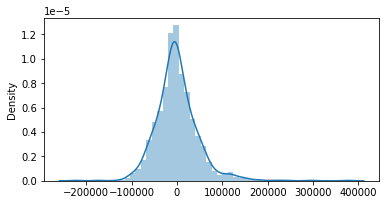

In [198]:
res = y_train - y_train_pred
plt.figure(figsize=(6,3))
sns.distplot(res)
plt.show()

Residuals normally distributed and centered around mean

<a id="Ridge"></a>
## 5.4 Ridge Regression
Taking a range of alphas to check with. Ideally this step is not needed and a value or range of alpha values can be choosen. However, for assignment purpose checking for all these alpha values.

In [199]:
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [200]:
model_ridge_cv.best_params_

{'alpha': 8.0}

In [201]:
cv_ridge_results = pd.DataFrame(model_ridge_cv.cv_results_)
cv_ridge_results = cv_ridge_results[cv_ridge_results['param_alpha']<=75]
cv_ridge_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.014036      0.004774         0.003061        0.000148      0.0001   
1       0.013053      0.003601         0.004870        0.002574       0.001   
2       0.016601      0.006323         0.004282        0.001574        0.01   
3       0.013785      0.004405         0.003037        0.000106        0.05   
4       0.011751      0.001403         0.004903        0.003985         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20604.832079      -21067.755140      -22450.614581   
1   {'alpha': 0.001}      -20604.505912      -21059.992266      -22443.225989   
2    {'alpha': 0.01}      -20602.486147      -20985.099645      -22398.192819   
3    {'alpha': 0.05}      -20587.913953      -20726.762033      -22324.964158   
4     {'alpha': 0.1}      -20565.665939      -20526.122517      -22310.309707   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -20879.377620      -22768.397380    -21554.195360      879.903139   
1      -20874.338588      -22759.345337    -21548.281619      877.603446   
2      -20825.628549      -22676.559935    -21497.593419      862.142101   
3      -20649.809731      -22396.974396    -21337.284854      837.301528   
4      -20561.578928      -22153.681073    -21223.471633      825.059110   

   rank_test_score  split0_train_score  split1_train_score  \
0               24       -17871.796506       -17072.054337   
1               23       -17869.365292       -17068.383438   
2               22       -17846.870999       -17034.678128   
3               21       -17780.003102       -16943.449953   
4               20       -17738.438941       -16899.108523   

   split2_train_score  split3_train_score  split4_train_score  \
0       -17198.335250       -17941.580269       -15610.201912   
1       -17196.453940       -17938.628592       -15609.129889   
2       -17179.000371       -17911.676544       -15600.904739   
3       -17135.855304       -17840.975816       -15608.550317   
4       -17120.185357       -17822.135370       -15654.240959   

   mean_train_score  std_train_score  
0     -17138.793655       839.803737  
1     -17136.392230       839.237220  
2     -17114.626156       833.469866  
3     -17061.766898       806.765915  
4     -17046.821830       780.503456

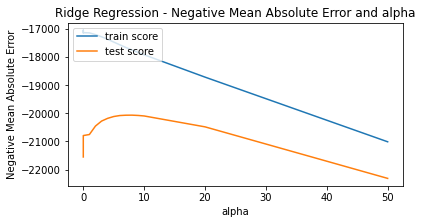

In [202]:
# plotting mean test and train scores with alpha 
cv_ridge_results['param_alpha'] = cv_ridge_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(6,3))

plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_train_score'])
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge Regression - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

 Data Interpretation of Ridge Regression 
- Larger the Negative Mean Absolute Error the better
- As the value of Alpha (coefficient of the regularization term) increases the emphasis on accuracy of the model reduces and hence model could make more errors.
- The Train score dips with the increasing value of alpha.
- Initially for small values of alpha the test score is good and then reduces.

**The alpha parameter in Scikit-Learn is nothing but theory lambda**<br/>
 **The test curve is peaking around 7 and that is the value of alpha value chosen for Ridge Regression** 

In [203]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.50070568e+00, -9.53263290e+02,  2.22153915e+04,  7.22974364e+04,
        2.42508851e+04,  3.17207167e+04,  2.22380346e+04,  3.51630963e+04,
        3.25351696e+04,  1.18914936e+04,  6.96315102e+03,  1.60938976e+04,
        3.85625633e+03,  3.36255357e+04,  6.55200466e+04,  1.89534990e+04,
        3.26430920e+04,  1.73640577e+04,  1.20248359e+03,  2.84331005e+04,
        3.32609988e+04,  2.13744037e+04,  3.22616444e+04,  2.27423056e+04,
        1.34252140e+04,  3.57300303e+02, -1.81892168e+03,  2.81769510e+03,
       -7.86981044e+02, -7.02007583e+03,  3.79735542e+03,  6.94407672e+03,
       -1.58019232e+04, -3.81123367e+03, -1.07921130e+04, -1.44306853e+04,
       -1.54689670e+04, -1.12536534e+04,  8.40763330e+02,  6.41023751e+03,
       -2.55087912e+03, -1.64169546e+03, -7.34478580e+03, -3.54798980e+02,
       -1.19230106e+03,  1.47162937e+04,  5.40690888e+02,  4.41662995e+03,
       -2.60171174e+03, -7.36817469e+03, -1.64333023e+03, -9.28885908e+02,
        1.48296674e+03,  

 Data Interpretation of Ridge Regression 
- The coefficents are dense and close to about zero

<a id="lasso"></a>
## 5.5 Lasso Regression

In [204]:
lasso = Lasso()

model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [205]:
model_lasso_cv.best_params_

{'alpha': 100}

In [206]:
cv_lasso_results = pd.DataFrame(model_lasso_cv.cv_results_)
cv_lasso_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.139671      0.026238         0.005841        0.002326      0.0001   
1       0.134070      0.023534         0.003866        0.001651       0.001   
2       0.136775      0.024991         0.003919        0.001630        0.01   
3       0.138653      0.030605         0.003887        0.001614        0.05   
4       0.109899      0.008273         0.003646        0.001151         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20605.048282      -21068.764569      -22443.882599   
1   {'alpha': 0.001}      -20604.994514      -21068.667953      -22443.727588   
2    {'alpha': 0.01}      -20604.464599      -21067.701803      -22442.177474   
3    {'alpha': 0.05}      -20602.120286      -21063.407884      -22436.827828   
4     {'alpha': 0.1}      -20599.188040      -21058.040585      -22431.157979   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -20879.586483      -22731.117352    -21545.679857      868.095220   
1      -20879.483112      -22738.043906    -21546.983414      869.995475   
2      -20878.412157      -22752.242901    -21548.999787      873.961396   
3      -20873.663259      -22746.214499    -21544.446751      872.916692   
4      -20867.730003      -22738.657371    -21538.954795      871.813689   

   rank_test_score  split0_train_score  split1_train_score  \
0               25       -17872.024247       -17072.418382   
1               26       -17872.008445       -17072.394792   
2               27       -17871.854411       -17072.158891   
3               24       -17871.169937       -17071.111357   
4               23       -17870.314806       -17069.852959   

   split2_train_score  split3_train_score  split4_train_score  \
0       -17197.961367       -17941.888001       -15610.324086   
1       -17197.938281       -17941.865326       -15610.318605   
2       -17197.725317       -17941.658634       -15610.274818   
3       -17196.748438       -17940.739944       -15610.075355   
4       -17195.534472       -17939.591724       -15609.826374   

   mean_train_score  std_train_score  
0     -17138.923217       839.846803  
1     -17138.905090       839.841753  
2     -17138.734414       839.792021  
3     -17137.969006       839.572362  
4     -17137.024067       839.297131

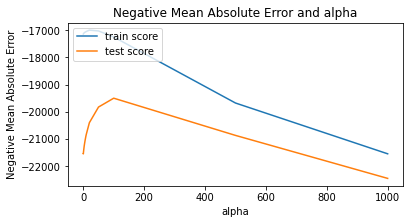

In [207]:
# plotting mean test and train scoes with alpha 
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(6,3))
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

 Data Interpretation of Lasso Regression 
- Larger the Negative Mean Absolute Error the better
- As the value of Alpha (coefficient of the regularization term) increases the emphasis on accuracy of the model reduces and hence model could make more errors.
- The Train score dips with the increasing value of alpha.
- Initially for small values of alpha the test score is good and then reduces.

**The alpha parameter in Scikit-Learn is nothing but theory lambda**<br/>
 **The test curve is peaking around 100 and that is the value of alpha value chosen for Lasso Regression** 

In [208]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [209]:
lasso.coef_

array([-1.54331099e+00, -0.00000000e+00,  2.44301089e+04,  1.04846698e+05,
        2.75647317e+04,  2.75033455e+04,  1.57585432e+04,  3.32646108e+04,
        3.12889953e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.54763277e+03,  0.00000000e+00,  2.19380943e+05,  1.89529994e+04,
        1.64789261e+04,  1.12662217e+04, -0.00000000e+00,  2.73370525e+04,
        4.62145250e+03,  1.37669576e+04,  4.04920091e+04,  0.00000000e+00,
        9.47464184e+03, -0.00000000e+00, -6.51540377e+02, -0.00000000e+00,
       -0.00000000e+00, -2.48502969e+03,  2.24045035e+03, -0.00000000e+00,
       -1.63077301e+04, -5.73665183e+02, -6.72453518e+03, -1.11463737e+04,
       -1.58237985e+04, -1.14831819e+04,  0.00000000e+00,  3.47071027e+03,
       -3.52668507e+03, -1.54890045e+03, -7.36125157e+03, -0.00000000e+00,
       -0.00000000e+00,  1.46592807e+04,  0.00000000e+00,  2.29133298e+03,
       -1.21380701e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

 Data Interpretation of Lasso Regression 
- A lot of coefficients are exactly to zero
- The irrelevant coeffients are clamped down to a zero value

<a id="evaluation"></a>
# 6. Predictions and Evaluation on the Test Set 

In [210]:
X_test[scaled_features] = scaler.transform(X_test[scaled_features])

### Predictions using Linear Regression Model Built Using StatsModel

Mean Square Error: 2492031720.4851418
Test Data Set R-squared: 0.6128420596424462


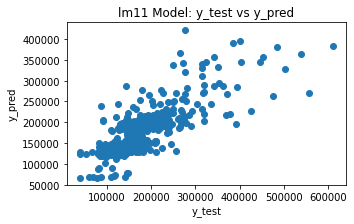

In [212]:
X_test_sm = sm.add_constant(X_test[feature_cols])

y_test_pred = lm_11.predict(X_test_sm)
print("Mean Square Error:", mean_squared_error(y_test, y_test_pred))
print("Test Data Set R-squared:", r2_score(y_true = y_test, y_pred = y_test_pred))
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
plt.title('lm11 Model: y_test vs y_pred')     
plt.xlabel('y_test') 
plt.ylabel('y_pred')    
plt.show()

 Data Interpretation on Model lm_11
 + The trained model had **R2 of 61%** and adjusted R2 of 74.9%
 + The test model gave an **R2 score of 61%** which is a close fit and signifies that **lm_11 is a good fit**.

Text(0, 0.5, 'Sale Price')

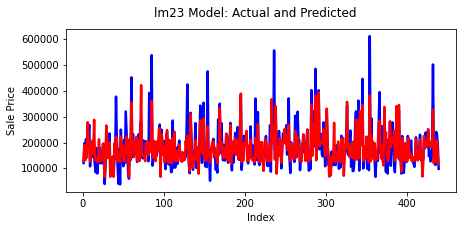

In [213]:
#Actual vs Predicted
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(7,3))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('lm23 Model: Actual and Predicted')  
plt.xlabel('Index')    
plt.ylabel('Sale Price')  

### Predictions using Ridge Regression

In [214]:
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8601528214637093
0.8574557818431174


 Data Interpretation of Ridge Regression Predictions 
- The R2 score of both train and test is high and approximately same.

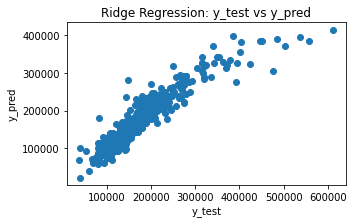

In [215]:
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
plt.title('Ridge Regression: y_test vs y_pred')     
plt.xlabel('y_test') 
plt.ylabel('y_pred')    
plt.show()

In [216]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -22748.551),
 ('LotFrontage', -1.501),
 ('LotArea', -953.263),
 ('OverallQual', 22215.392),
 ('OverallCond', 72297.436),
 ('MasVnrArea', 24250.885),
 ('ExterQual', 31720.717),
 ('BsmtQual', 22238.035),
 ('BsmtExposure', 35163.096),
 ('BsmtFinSF1', 32535.17),
 ('BsmtUnfSF', 11891.494),
 ('TotalBsmtSF', 6963.151),
 ('HeatingQC', 16093.898),
 ('1stFlrSF', 3856.256),
 ('GrLivArea', 33625.536),
 ('BsmtFullBath', 65520.047),
 ('FullBath', 18953.499),
 ('HalfBath', 32643.092),
 ('BedroomAbvGr', 17364.058),
 ('KitchenQual', 1202.484),
 ('TotRmsAbvGrd', 28433.1),
 ('Fireplaces', 33260.999),
 ('GarageCars', 21374.404),
 ('GarageArea', 32261.644),
 ('WoodDeckSF', 22742.306),
 ('OpenPorchSF', 13425.214),
 ('MoSold', 357.3),
 ('GarageBltAge', -1818.922),
 ('PropertyAge', 2817.695),
 ('PropertyRemodAddAge', -786.981),
 ('SaleAge', -7020.076),
 ('Has2ndFlr', 3797.355),
 ('HasBsmt', 6944.077),
 ('HasGarage', -15801.923),
 ('BldgType_2fmCon', -3811.234),
 ('BldgType_Duplex', -10792.113),


### Predictions using Lasso Regression

In [217]:
# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8647192648491976
0.8578463839274996


 Data Interpretation of Lasso Regression Predictions 
- The R2 score of both train and test is high and approximately same.

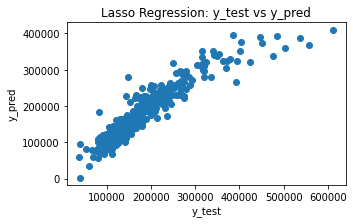

In [218]:
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_test_pred)
plt.title('Lasso Regression: y_test vs y_pred')     
plt.xlabel('y_test') 
plt.ylabel('y_pred')    
plt.show()

In [219]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -33213.094),
 ('LotFrontage', -1.543),
 ('LotArea', -0.0),
 ('OverallQual', 24430.109),
 ('OverallCond', 104846.698),
 ('MasVnrArea', 27564.732),
 ('ExterQual', 27503.346),
 ('BsmtQual', 15758.543),
 ('BsmtExposure', 33264.611),
 ('BsmtFinSF1', 31288.995),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', 0.0),
 ('1stFlrSF', 1547.633),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 219380.943),
 ('FullBath', 18952.999),
 ('HalfBath', 16478.926),
 ('BedroomAbvGr', 11266.222),
 ('KitchenQual', -0.0),
 ('TotRmsAbvGrd', 27337.052),
 ('Fireplaces', 4621.452),
 ('GarageCars', 13766.958),
 ('GarageArea', 40492.009),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 9474.642),
 ('MoSold', -0.0),
 ('GarageBltAge', -651.54),
 ('PropertyAge', -0.0),
 ('PropertyRemodAddAge', -0.0),
 ('SaleAge', -2485.03),
 ('Has2ndFlr', 2240.45),
 ('HasBsmt', -0.0),
 ('HasGarage', -16307.73),
 ('BldgType_2fmCon', -573.665),
 ('BldgType_Duplex', -6724.535),
 ('BldgType_Twnhs', -11146.374),
 ('BldgType_TwnhsE',

Even for a small value of alpha, a significant number of coefficients are zero. Lasso Regression Model is more advantageous than Ridge Regression Model.